<br><br><br>
<h1 align="center">MSIN0166: Data Engineering</h1>
<br><br><br><br>
<h1 align="center">Individual Coursework</h1>
<br><br><br><br><br><br>
<h3 align="center">Word Count: 3899 </h3>
<h4 align="center">(excluding table of contents, figures and references) </h4>
<br><br><br>
<h4 align="center">April 2022</h4>
<br>

## **Table of Contents**

* [1. Introduction](#1.-Introduction)
* [2. Data Collection](#2.-Data-Collection)
    * [2.1 General Film Information from IMDb](#2.1-General-Film-Information-from-IMDb)
    * [2.2 Box Office Income Data from MOJO](#2.2-Box-Office-Income-Data-from-MOJO)
* [3. Data Transformation](#3.-Data-Transformation)
    * [3.1 Duration Time](#3.1-Duration-Time)
    * [3.2 Income Proportions](#3.2-Income-Proportions)
    * [3.3 Rankings](#3.3-Rankings)
    * [3.4 Final Cleaning](#3.4-Final-Cleaning)
* [4. Machine Learning with API](#4.-Machine-Learning-with-API)
    * [4.1 Data Pre-processing](#4.1-Data-Pre-processing)
    * [4.2 Machine Learning Model](#4.2-Machine-Learning-Model)
    * [4.3 Serve with API](#4.3-Serve-with-API)
* [5. PostgreSQL Schema and Database](#5.-PostgreSQL-Schema-and-Database)
    * [5.1 Schema Structure](#5.1-Schema-Structure)
    * [5.2 Prepare Subset Tables](#5.2-Prepare-Subset-Tables)
    * [5.3 Write into PostgreSQL Database](#5.3-Write-into-PostgreSQL-Database)
    * [5.4 SQL Query Example](#5.4-SQL-Query-Example)
* [6. Data Storage Control and Lineage](#6.-Data-Storage-Control-and-Lineage)
    * [6.1 Data Storage](#6.1-Data-Storage)
    * [6.2 Source Version Control](#6.2-Source-Version-Control)
    * [6.3 Data Lineage](#6.3-Data-Lineage)
    * [6.4 Automate Terraform with GitHub Actions](#6.4-Automate-Terraform-with-GitHub-Actions)
* [7. Conclusion](#7.-Conclusion)
    * [7.1 Main Takeaways](#7.1-Main-Takeaways)
    * [7.2 Limitations and Future Steps](#7.2-Limitations-and-Future-Steps)
* [References](#References)

<br><br>
## 1	Introduction

<br>
People have recognized the importance of data and information from a very early age. Having access to timely and comprehensive data and being able to gain insights from them have been proven extremely valuable in not only business and technology researches, but also many other fields. Therefore, data management has always been an important skill. In today’s era of information explosion, the potential available data is experiencing exponential growth. A 2000 study (Gray and Shenoy, pp.9) concluded that, with data stores grows huge, our biggest challenge will be “*to make it easy to access and manage them… automating all the tasks of data organization, accesses and protection*”. Data Engineering, as the practice designing and building systems for collecting, storing, and analysing data at scale (Coursera, 2021), is therefore of significant value.
<br><br>
One particular industry that  demands more attention to data engineering is the film industry. Ever since the first tickets to “moving pictures” was sold by Lumière brothers in 1895, films has been not only a charming dream-making art, but also a overall immensely profitable tool. According to Forbes, the film industry has managed to break 100 billion dollar for the first time in 2019, to which the box office income contributed nearly 50 percent (Escandon, 2020). However, with the continuous development of modern film technology and the improvement of the public aesthetic requirements, the production cost of film has been rising year by year. As a result, the risks that film distributors and producers have to take on have also largely increased.
<br><br>
This report aims to help with such problem with data engineering skills by collecting data on the IMDb top 250 rated films from multiple sources and build a data processing system for future utilities. Although the top 250 rated film list from IMDb has been used by many analysts, it is still worth looking at since IMDb is still the most popular film rating website around the world so that their data is less likely to be biased. Moreover, most researched using the top 250 list primarily focus on the rating and public praise of the films. While in this report, combined with data from Box Office Mojo, a IMDb Pro service website that records the box office income, the films are being examined from a more economic and business perspective.
<br><br>
In this report, web scraping by BeautifulSoup and regular expression are used for data mining from relevant websites. The collected data are then further cleaned and transformed for analyse and storage. A querying system based on PostgreSQL is then constructed, which can be used by film distributors for strategy and decision making reference. Besides, machine learning pipeline and models are also trained for predictive analytics and converted into APIs by Flask, allowing easier usage for non data analysts in the future.
<br><br><br>

## 2	Data Collection

<br>
Firstly, all libraries and packages used in this report are imported at once.

In [1]:
# Import libraries
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import re
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from flask import Flask, request, jsonify
import joblib
import traceback
import json

from dvc.api import make_checkpoint
from IPython.display import Image

# Display full outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

In terms of data processing, Apache Spark is installed at the very beginning to utilize in-memory caching, and optimize query execution.
Note that in the exported pdf version, the line of spark installing is commented out after it is successfully installed for the connivence of reading because the output of this cell is extremely long (taking up over 10 pages) and does not provide much useful information. In the notebook version, this cell is run as normal.

In [2]:
!bash install_spark.sh


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

Hit:1 http://eu-west-1.ec2.archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://eu-west-1.ec2.archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://eu-west-1.ec2.archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]    
Hi

spark-3.2.1-bin-hadoop3.2/data/mllib/images/partitioned/cls=multichannel/date=2018-01/BGRA_alpha_60.png
spark-3.2.1-bin-hadoop3.2/data/mllib/images/partitioned/cls=multichannel/date=2018-02/
spark-3.2.1-bin-hadoop3.2/data/mllib/images/partitioned/cls=multichannel/date=2018-02/chr30.4.184.jpg
spark-3.2.1-bin-hadoop3.2/data/mllib/images/partitioned/cls=multichannel/date=2018-02/grayscale.jpg
spark-3.2.1-bin-hadoop3.2/data/mllib/iris_libsvm.txt
spark-3.2.1-bin-hadoop3.2/data/mllib/kmeans_data.txt
spark-3.2.1-bin-hadoop3.2/data/mllib/pagerank_data.txt
spark-3.2.1-bin-hadoop3.2/data/mllib/pic_data.txt
spark-3.2.1-bin-hadoop3.2/data/mllib/ridge-data/
spark-3.2.1-bin-hadoop3.2/data/mllib/ridge-data/lpsa.data
spark-3.2.1-bin-hadoop3.2/data/mllib/sample_binary_classification_data.txt
spark-3.2.1-bin-hadoop3.2/data/mllib/sample_fpgrowth.txt
spark-3.2.1-bin-hadoop3.2/data/mllib/sample_isotonic_regression_libsvm_data.txt
spark-3.2.1-bin-hadoop3.2/data/mllib/sample_kmeans_data.txt
spark-3.2.1-bin-h

spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaPipelineExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaPolynomialExpansionExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaPowerIterationClusteringExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaPrefixSpanExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaQuantileDiscretizerExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaRFormulaExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaRandomForestClassifierExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaRandomForestRegressorExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaRobustScalerExample.java
sp

spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaCustomReceiver.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaDirectKafkaWordCount.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaDirectKerberizedKafkaWordCount.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaNetworkWordCount.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaQueueStream.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaRecord.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaRecoverableNetworkWordCount.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaSqlNetworkWordCount.java
spark-3.2.1

spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/hypothesis_testing_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/hypothesis_testing_kolmogorov_smirnov_test_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/isotonic_regression_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/k_means_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/kernel_density_estimation_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/kmeans.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/latent_dirichlet_allocation_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/linear_regression_with_sgd_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/logistic_regression.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/logistic_regression_with_lbfgs_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/multi_class_metrics_example.py
spark-3.2.1-bin-had

spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/DFSReadWriteTest.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/DriverSubmissionTest.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ExceptionHandlingTest.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/GroupByTest.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/HdfsTest.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/LocalALS.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/LocalFileLR.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/LocalKMeans.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/LocalLR.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/LocalPi.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/

spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/MinMaxScalerExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/ModelSelectionViaCrossValidationExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/ModelSelectionViaTrainValidationSplitExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/MulticlassLogisticRegressionWithElasticNetExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/MultilayerPerceptronClassifierExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/NGramExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/NaiveBayesExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/NormalizerExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml

spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/PrefixSpanExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/RandomForestClassificationExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/RandomForestRegressionExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/RandomRDDGeneration.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/RankingMetricsExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/RecommendationExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/SVDExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/SVMWithSGDExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/SampledRDDs.scala
spark-3.2.1-bin-hadoo

spark-3.2.1-bin-hadoop3.2/jars/commons-collections-3.2.2.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-compiler-3.0.16.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-compress-1.21.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-crypto-1.1.0.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-dbcp-1.4.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-io-2.8.0.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-lang-2.6.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-lang3-3.12.0.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-logging-1.1.3.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-math3-3.4.1.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-net-3.1.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-pool-1.5.4.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-text-1.6.jar
spark-3.2.1-bin-hadoop3.2/jars/compress-lzf-1.0.3.jar
spark-3.2.1-bin-hadoop3.2/jars/core-1.1.2.jar
spark-3.2.1-bin-hadoop3.2/jars/curator-client-2.13.0.jar
spark-3.2.1-bin-hadoop3.2/jars/curator-framework-2.13.0.jar
spark-3.2.1-bin-hadoop3.2/jars/curator-recipes-2.13.0.jar
spark-3.2.1

spark-3.2.1-bin-hadoop3.2/jars/parquet-common-1.12.2.jar
spark-3.2.1-bin-hadoop3.2/jars/parquet-encoding-1.12.2.jar
spark-3.2.1-bin-hadoop3.2/jars/parquet-format-structures-1.12.2.jar
spark-3.2.1-bin-hadoop3.2/jars/parquet-hadoop-1.12.2.jar
spark-3.2.1-bin-hadoop3.2/jars/parquet-jackson-1.12.2.jar
spark-3.2.1-bin-hadoop3.2/jars/protobuf-java-2.5.0.jar
spark-3.2.1-bin-hadoop3.2/jars/py4j-0.10.9.3.jar
spark-3.2.1-bin-hadoop3.2/jars/pyrolite-4.30.jar
spark-3.2.1-bin-hadoop3.2/jars/rocksdbjni-6.20.3.jar
spark-3.2.1-bin-hadoop3.2/jars/scala-collection-compat_2.12-2.1.1.jar
spark-3.2.1-bin-hadoop3.2/jars/scala-compiler-2.12.15.jar
spark-3.2.1-bin-hadoop3.2/jars/scala-library-2.12.15.jar
spark-3.2.1-bin-hadoop3.2/jars/scala-parser-combinators_2.12-1.1.2.jar
spark-3.2.1-bin-hadoop3.2/jars/scala-reflect-2.12.15.jar
spark-3.2.1-bin-hadoop3.2/jars/scala-xml_2.12-1.2.0.jar
spark-3.2.1-bin-hadoop3.2/jars/shapeless_2.12-2.3.3.jar
spark-3.2.1-bin-hadoop3.2/jars/shims-0.9.0.jar
spark-3.2.1-bin-hadoop3

spark-3.2.1-bin-hadoop3.2/python/docs/make.bat
spark-3.2.1-bin-hadoop3.2/python/docs/make2.bat
spark-3.2.1-bin-hadoop3.2/python/docs/source/
spark-3.2.1-bin-hadoop3.2/python/docs/source/_static/
spark-3.2.1-bin-hadoop3.2/python/docs/source/_static/copybutton.js
spark-3.2.1-bin-hadoop3.2/python/docs/source/_static/css/
spark-3.2.1-bin-hadoop3.2/python/docs/source/_static/css/pyspark.css
spark-3.2.1-bin-hadoop3.2/python/docs/source/_templates/
spark-3.2.1-bin-hadoop3.2/python/docs/source/_templates/autosummary/
spark-3.2.1-bin-hadoop3.2/python/docs/source/_templates/autosummary/class.rst
spark-3.2.1-bin-hadoop3.2/python/docs/source/_templates/autosummary/class_with_docs.rst
spark-3.2.1-bin-hadoop3.2/python/docs/source/conf.py
spark-3.2.1-bin-hadoop3.2/python/docs/source/development/
spark-3.2.1-bin-hadoop3.2/python/docs/source/development/contributing.rst
spark-3.2.1-bin-hadoop3.2/python/docs/source/development/debugging.rst
spark-3.2.1-bin-hadoop3.2/python/docs/source/development/index.

spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/__init__.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/__init__.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/_shared_params_code_gen.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/_shared_params_code_gen.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/shared.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/shared.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/pipeline.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/pipeline.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/recommendation.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/recommendation.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/regression.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/regression.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/stat.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/stat.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/tests/
spark-3.2.1-bin-hadoop3.2/python/pysp

spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/missing/window.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/ml.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/mlflow.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/namespace.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/numpy_compat.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/plot/
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/plot/__init__.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/plot/core.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/plot/matplotlib.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/plot/plotly.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/series.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/spark/
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/spark/__init__.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/spark/accessors.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/spark/functions.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/spark/utils.py
spark-3.2.1

spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/avro/functions.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/catalog.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/catalog.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/column.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/column.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/conf.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/conf.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/context.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/context.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/dataframe.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/dataframe.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/functions.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/functions.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/group.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/group.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/pandas/
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/pandas/__init__.py
spark-3.2.1-bin-hadoop3.2/python

spark-3.2.1-bin-hadoop3.2/python/pyspark/worker.py
spark-3.2.1-bin-hadoop3.2/python/pyspark.egg-info/
spark-3.2.1-bin-hadoop3.2/python/pyspark.egg-info/PKG-INFO
spark-3.2.1-bin-hadoop3.2/python/pyspark.egg-info/SOURCES.txt
spark-3.2.1-bin-hadoop3.2/python/pyspark.egg-info/dependency_links.txt
spark-3.2.1-bin-hadoop3.2/python/pyspark.egg-info/requires.txt
spark-3.2.1-bin-hadoop3.2/python/pyspark.egg-info/top_level.txt
spark-3.2.1-bin-hadoop3.2/python/run-tests
spark-3.2.1-bin-hadoop3.2/python/run-tests-with-coverage
spark-3.2.1-bin-hadoop3.2/python/run-tests.py
spark-3.2.1-bin-hadoop3.2/python/setup.cfg
spark-3.2.1-bin-hadoop3.2/python/setup.py
spark-3.2.1-bin-hadoop3.2/python/test_coverage/
spark-3.2.1-bin-hadoop3.2/python/test_coverage/conf/
spark-3.2.1-bin-hadoop3.2/python/test_coverage/conf/spark-defaults.conf
spark-3.2.1-bin-hadoop3.2/python/test_coverage/coverage_daemon.py
spark-3.2.1-bin-hadoop3.2/python/test_coverage/sitecustomize.py
spark-3.2.1-bin-hadoop3.2/python/test_support

In [3]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/project/spark-3.2.1-bin-hadoop3.2"

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("PySpark App") \
    .config("spark.jars", "postgresql-42.3.2.jar") \
    .getOrCreate()

<br><br>
As  mentioned above, the dataset is contains two parts, the basic film information from IMDb top 250 list, and box office income data from Mojo.
<br><br>

### 2.1	General Film Information from IMDb

<br>
The source for the top 250 films is: http://www.imdb.com/chart/top. As demonstrated in the screenshot below, the page displays only the rank, title, year of first release and the IMDb rating score. But looking at the html files behind the page, it also contains the information of  “crew names”, which includes the name of the director and two leading actors and/or actresses.
<br><br>
When choosing the data source, another “IMDb Top 1000 movies” (available at https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating)  list was also noticeable (see screenshot attached below). From the appearance, this list contains a few more details on each film including genre, duration and brief introduction. However, this list seems to be more real-time updated, which results in very new films which has only less than 1/100 votes of the others making high positions. The list in therefore highly likely biased. Therefore, the top 250 list is used instead. And the missing information will be retrieved from other sources later. 
<br><br>
More importantly, whichever list used, the data mining step is similar. Simply by changing the url link and a few tags in the web scraping code used below, it can then be applied to other similar IMDb pages.
<br><br>

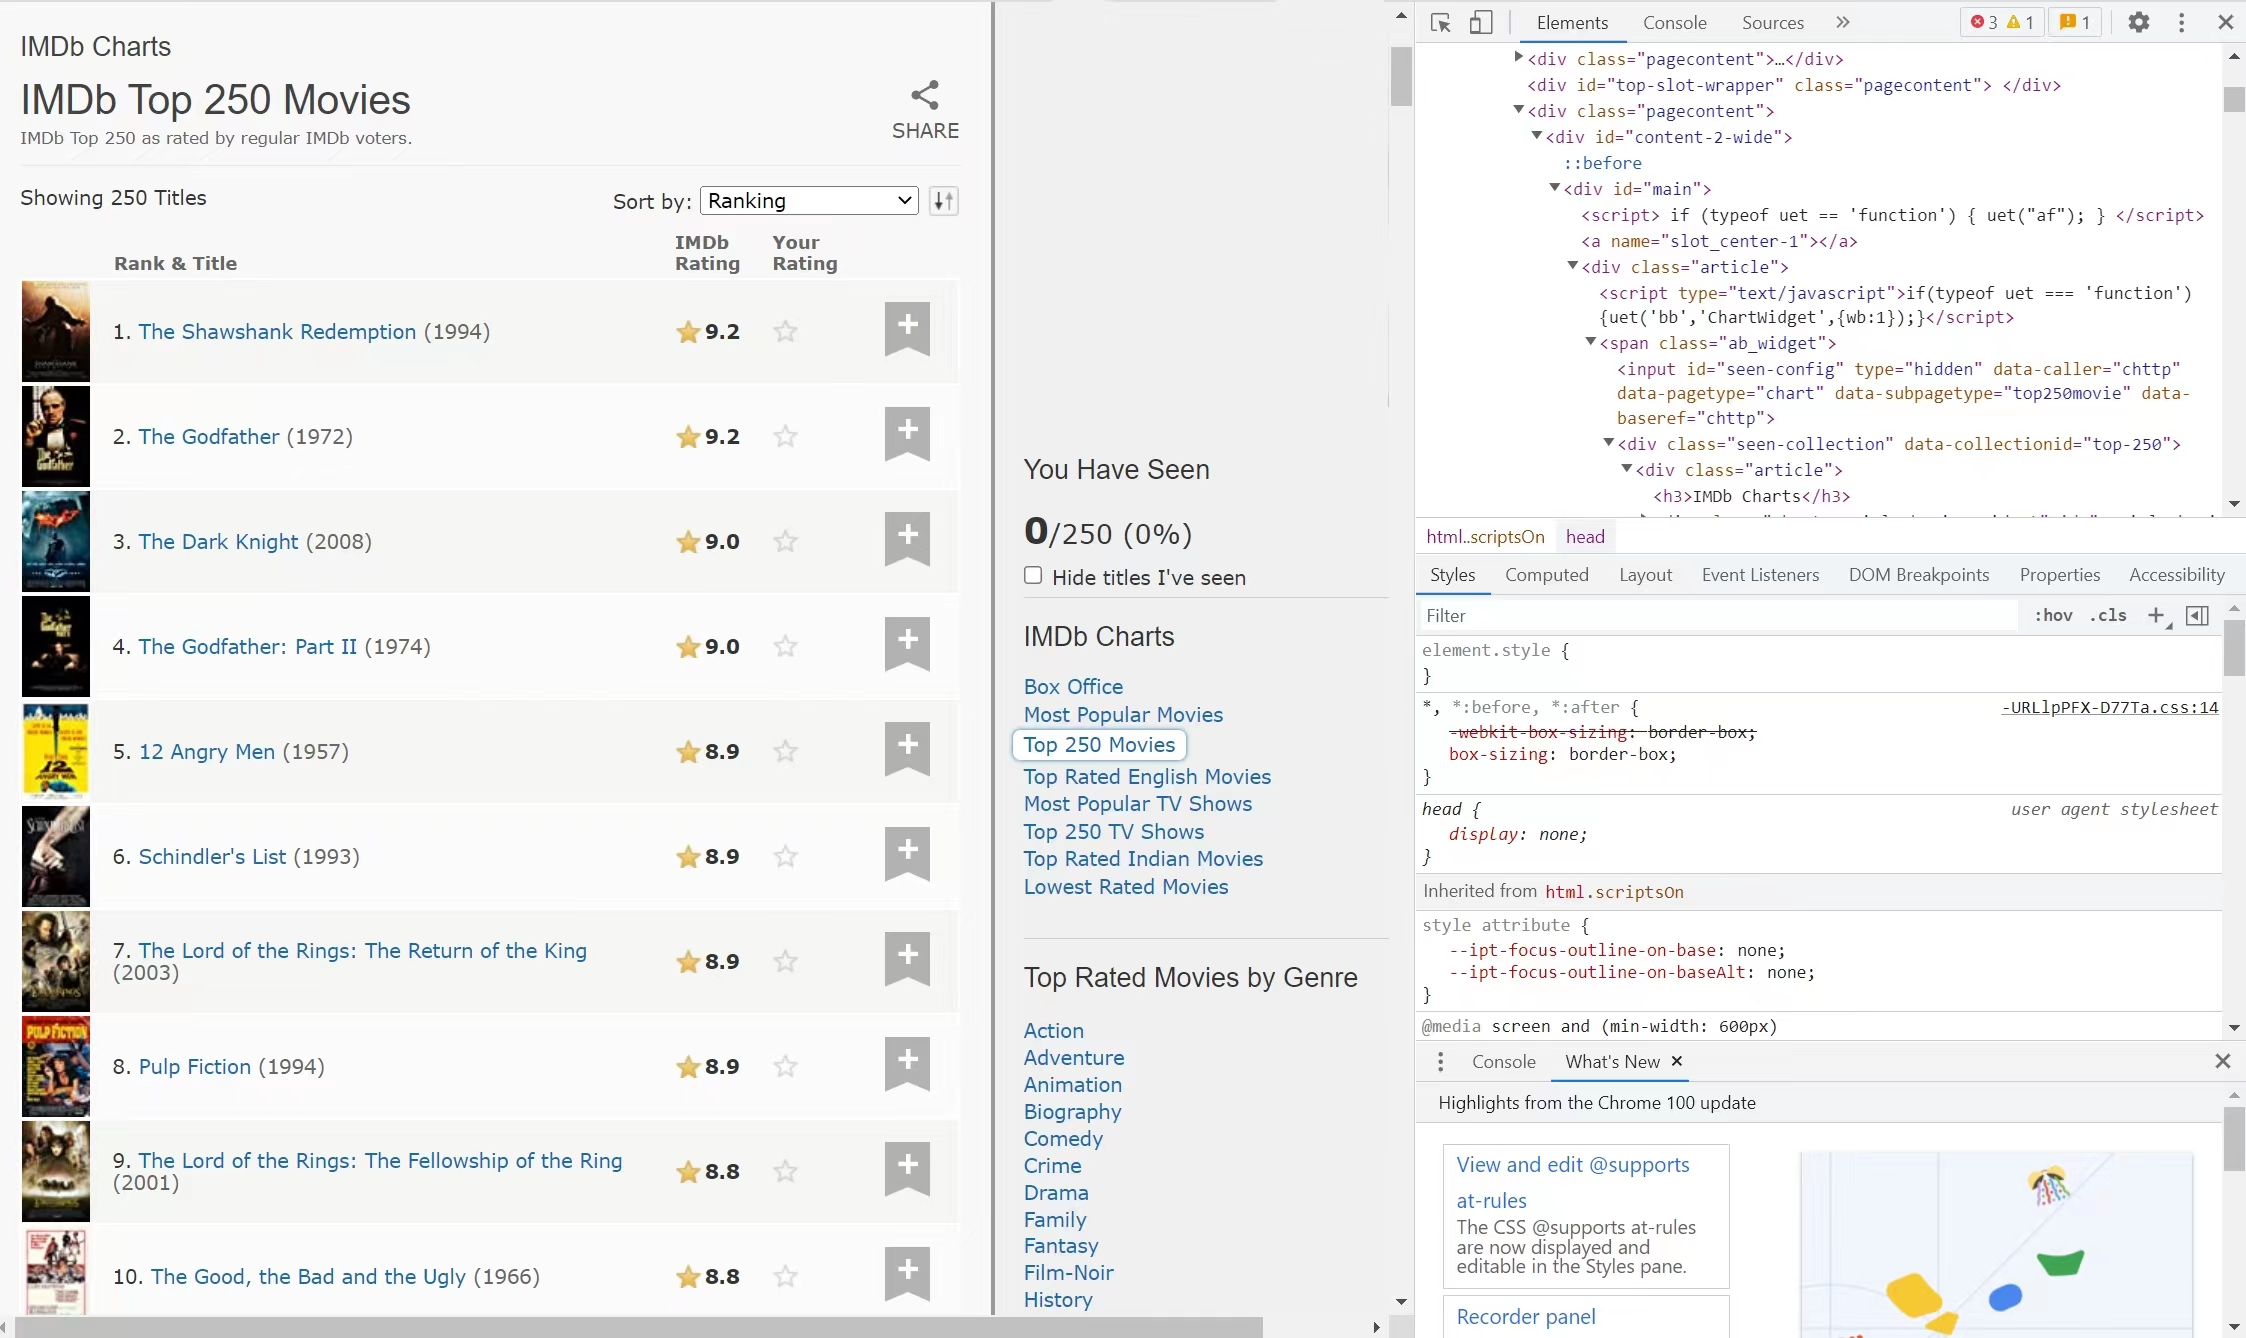

In [5]:
Image("/project/Individual/graphs/IMDb_Top_250.jpg", width = 900)

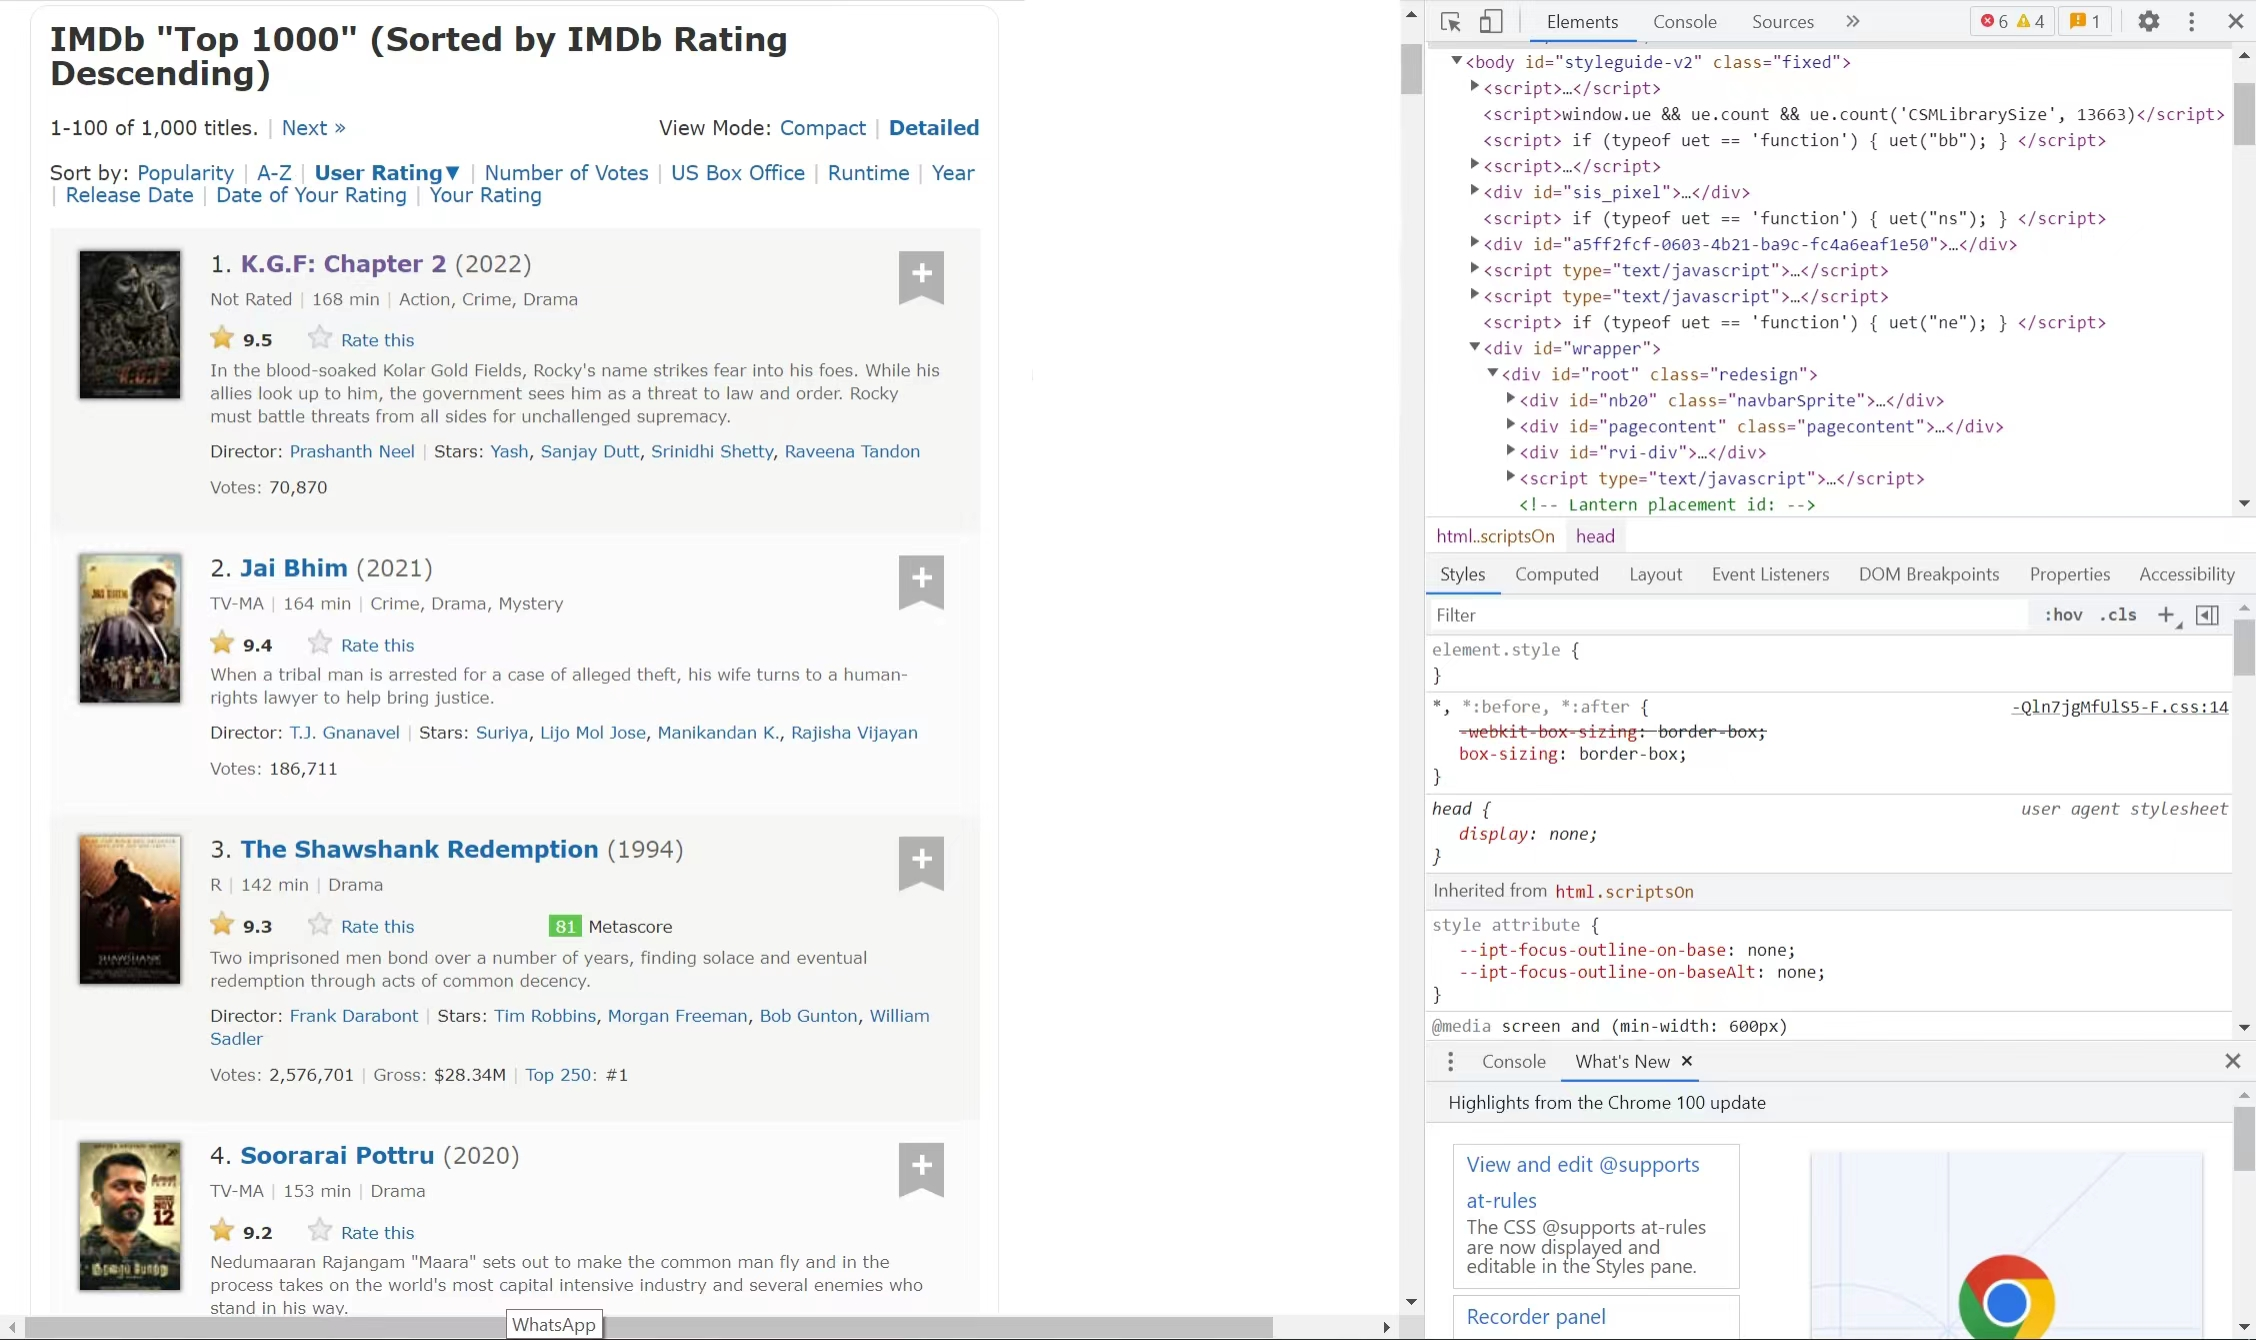

In [6]:
Image("/project/Individual/graphs/IMDb_Top_1000.jpg", width = 900)

<br>
The data scraping in this report is mostly done by using BeautifulSoup, a widely used and recognised library for pulling data out of HTML and XML files in Python. Although it does have the flaw of running relatively slower when performing certain heavy data tasks, the problem can be overcome with the assistance of the multithreading concept. And compared to other web scraping libraries such as Selenium and Scrapy, BeautifulSoup is much more user-friendly and it caters to efficient and comprehensive documentation (Arsalan, 2021).
<br><br>
For this project, the basic information, unique link (serving as the ID number of each film on IMDb database), crew information (as mentioned above), and the rating scores of each film among the top 250 are first extracted from the web page using BeautifulSoup and response. Title, year and ranking place are then further extracted from basic information. Crew information are split into director and leading cast. For each film, a dictionary is created for the aforementioned information. Finally, using the title as index, lists for each kind of data are generated and converted into a pandas data frame.
<br><br>
The code used in this section are inspired by and partially cited from @Priyank181 on GeeksforGeeks.org (Priyank181, 2021).

In [7]:
# Code cited and modified from @Priyank181

# Downloading IMDb top 250 movie's data
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [8]:
# Create empty list for flim information
list_movie = []

# Iterating over movies to extract each movie's details
for index in range(0, len(movies)):

    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    crew_names = crew[index].split(',')
    director = crew_names[0][:-7]
    star_cast = ','.join(crew_names[1:])
    
    data = {"movie_title": movie_title,
            "year": year,
            "place": place,
            "director":director,
            "star_cast": star_cast,
            "rating": ratings[index]}
    list_movie.append(data)

In [9]:
# Create empty lists for columns
list_place = []
list_title = []
list_year = []
list_director = []
list_cast = []
list_rating = []

# Get values of details from each flim
for movie in list_movie:
    list_place.append(movie['place'])
    list_title.append(movie['movie_title'])
    list_year.append(movie['year'])
    list_director.append(movie['director'])
    list_cast.append(movie['star_cast'])
    list_rating.append(movie['rating'])

In [10]:
# Create a dataframe from the lists
df = pd.DataFrame({'place':list_place, 'title':list_title, 'year':list_year, 'director':list_director, 'cast':list_cast, 
                   'rating':list_rating})
# By mannually examing, the place of 10 and 100 are mistaken as 1 and 10
# Fix the mistake mannually
df.at[9, 'place'] = 10
df.at[99, 'place'] = 100
make_checkpoint()

In [11]:
# A first glance at the dataframe now
df

place                      title  year              director  \
0       1   The Shawshank Redemption  1994        Frank Darabont   
1       2              The Godfather  1972  Francis Ford Coppola   
2       3            The Dark Knight  2008     Christopher Nolan   
3       4     The Godfather: Part II  1974  Francis Ford Coppola   
4       5               12 Angry Men  1957          Sidney Lumet   
..    ...                        ...   ...                   ...   
245   246                    Aladdin  1992          Ron Clements   
246   247                   The Help  2011           Tate Taylor   
247   248       Beauty and the Beast  1991        Gary Trousdale   
248   249  Du rififi chez les hommes  1955          Jules Dassin   
249   250         Dances with Wolves  1990         Kevin Costner   

                               cast             rating  
0       Tim Robbins, Morgan Freeman  9.233448955649196  
1          Marlon Brando, Al Pacino  9.155420879895704  
2      Christian Bale, Heath Ledger   8.98419169089792  
3         Al Pacino, Robert De Niro  8.983728365351341  
4          Henry Fonda, Lee J. Cobb  8.946349049388887  
..                              ...                ...  
245   Scott Weinger, Robin Williams   8.00698477273587  
246         Emma Stone, Viola Davis  8.004914344858326  
247      Paige O'Hara, Robby Benson    8.0044928030145  
248       Jean Servais, Carl Möhner  8.002438413502087  
249   Kevin Costner, Mary McDonnell  8.001570581053166  

[250 rows x 6 columns]

### 2.2 Box Office Income Data from MOJO

<br>
As discussed above, one of the main objectives of this report is to provide a more business related point of view using data for film companies. Therefore, a more important dataset is the box office income data. The source used here is Box Office Mojo (https://www.boxofficemojo.com/). Because it is a service provided also by IMDb, they share the same database for film information. Therefore, using the unique link for each film extracted from previous step, it is very easy to navigate to the detailed box office income page for each film in the data frame.
<br><br>
Take “*The Shawshank Redemption*” as an example, inserting its unique link “*/title/tt0111161/*” into the url link, the detailed information page will show up. As the screenshot below shows, this page includes not only the domestic, international and worldwide box office income data, but also the information missing from the previous top 250 list such as genre, duration and introduction. Other details such as distributor and release date are also included.
<br><br><br>

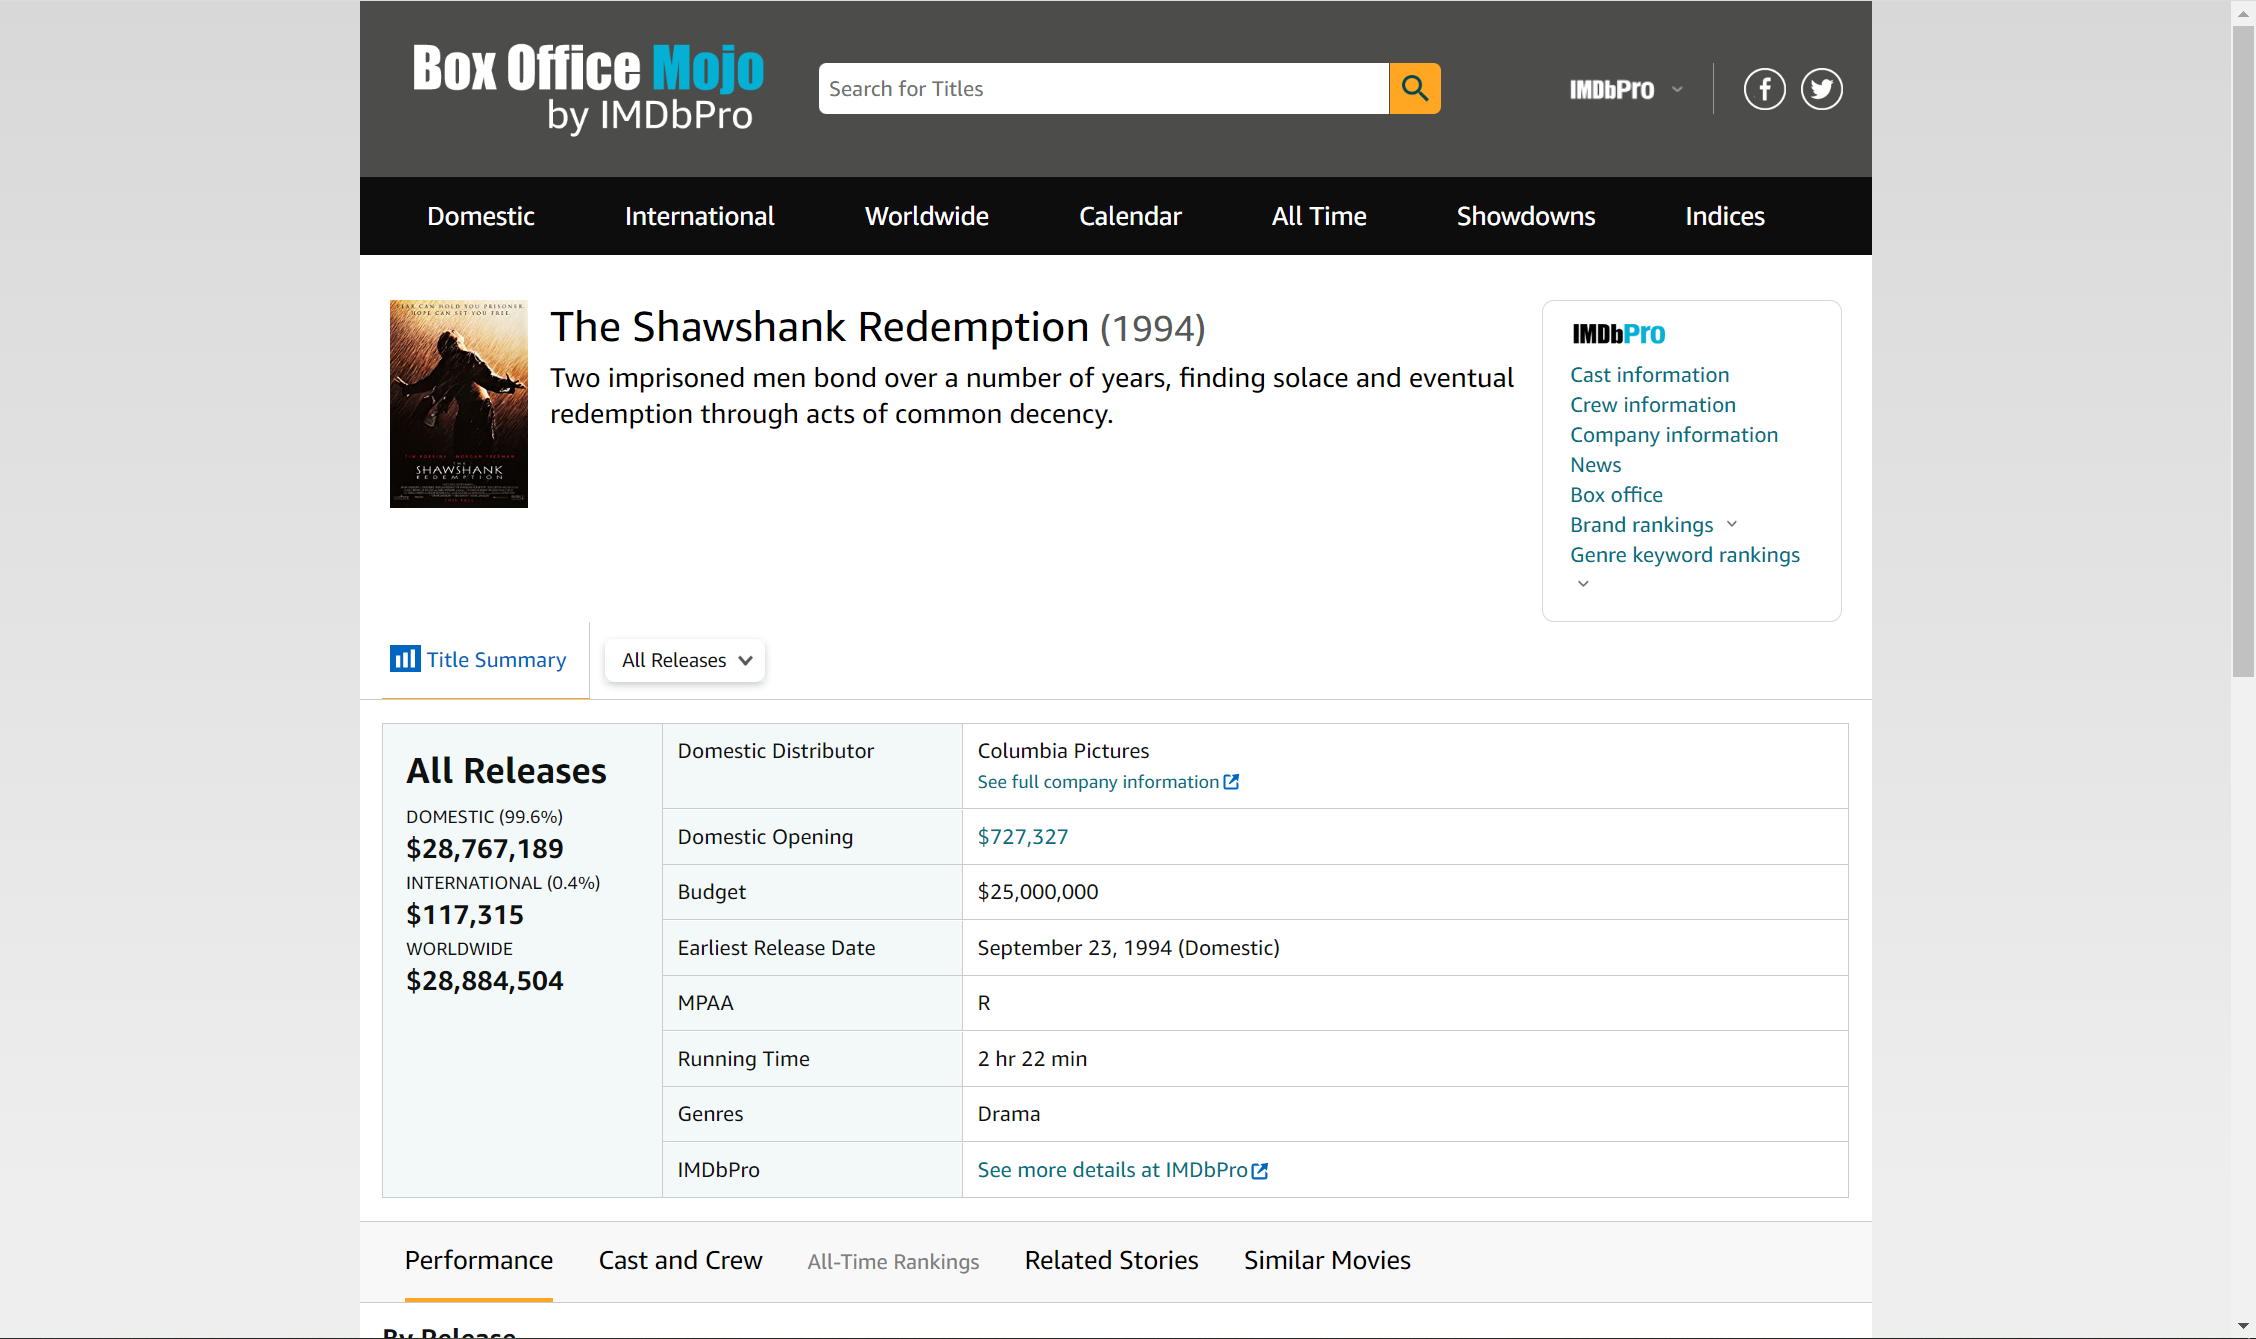

In [12]:
Image("/project/Individual/graphs/Mojo_example.png", width = 900)

<br><br>
To gather these data, BeautifulSoup is used again as before. Besides, since the html files behind Mojo is written differently than the top 250 list, regular expression is also used this time.
<br><br>
It is worth noticing that, all the money related data on this page including three box office numbers, opening income and the budget all share a span tag with the exactly same class: “money”. Therefore, they are collected together as a list names earnings, and then using indexing to extract different income separately. The intention at first was to extract all 5 numbers for each film. However, due to realistic limitations, a large number of films among the 250 are missing one or more of the 5 numbers, mostly the “domestic opening” and the “budget”. This may have be caused by the incomplete information disclosure of film companies. Therefore, the opening and budget columns are dropped in this report. Another problem is that, this top 250 includes some very old films which even date back to early 1920s. Some of these old films have even less than three numbers in the earnings list as they were only released domestically and thus missing international income as well. The solution for that is to constrain the length of the earnings list for each film. Only those with more than three earning numbers are further processed for now. While the others will be manually fixed later in the data transformation section.
<br><br>
Apart from the income data, genre, duration and distributor of each film are also extracted using regular expression. A small number of films have more then one labels in genre column. Only the main genre (the first) is considered. Similarly, for a few of those missing the distributor information, they are filled with zeros instead.
<br>

In [13]:
# Get box office income and more information from IMDb Mojo website
# Creat empty lists for more information columns
list_domestic = []
list_international = []
list_worldwide = []
list_genre = []
list_duration = []
list_distributor = []

# Web scraping film detailed information from Box Office Mojo website of each film
for i in df.index:
    link = links[i]
    URL =f"https://www.boxofficemojo.com{link}?ref_=bo_se_r_1"
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    soup_body = str(soup.body)
    
    info = soup.findAll('div', attrs= {'class': 'a-section a-spacing-none mojo-gutter mojo-summary-table'})
    for x in info:
        earning = x.find_all('span', attrs = {'class': 'money'})
        if len(earning)>= 3:
            domestic = earning[0].text.replace('$', '').replace(',', '')
            list_domestic.append(domestic)
            international = earning[1].text.replace('$', '').replace(',', '')
            list_international.append(international)
            worldwide = earning[2].text.replace('$', '').replace(',', '')
            list_worldwide.append(worldwide)
        else: # Some films are missing one or more number on box office incomes
            list_domestic.append(0)
            list_international.append(0)
            list_worldwide.append(0)
    genre = re.findall(r'Genres</span><span>(.*)', soup_body)
    list_genre.append(genre[0])
    duration = re.findall(r'Running Time</span><span>(.*)</span></div><div class="a-section a-spacing-none"><span>Genres', 
                          soup_body)
    list_duration.append(duration[0])
    distributor = re.findall(r'Domestic Distributor</span><span>(.*)<br/>', soup_body)
    if len(distributor)>0:
        list_distributor.append(distributor[0])
    else: # Some filem are missing distributor information
        list_distributor.append(0)

In [14]:
# Add information to data frame
df['genre'] = list_genre
df['duration'] = list_duration
df['domestic'] = list_domestic
df['international'] = list_international
df['worldwide'] = list_worldwide
df['distributor'] = list_distributor
make_checkpoint()

<br>
All the data collected from this section are merged into the basic information data frame from before after a few initial cleaning. For example, genre “Drama”, “Western”, “Horror” and “Comedy” are tagged slightly different from other genres in html files and needs manually dropping extra punctuations. Moreover, the unit of all three income columns are changed from dollars to thousands of dollars because otherwise, some of their incomes will be too large to write into PostgreSQL database in later steps.
<br><br>

In [15]:
# Clean the genre column
df['genre'].replace({'Drama</span></div><div class="a-section a-spacing-none"><span>': 'Drama'}, inplace=True)
df['genre'].replace({'Western</span></div><div class="a-section a-spacing-none"><span>': 'Western'}, inplace=True)
df['genre'].replace({'Horror</span></div><div class="a-section a-spacing-none"><span>': 'Horror'}, inplace=True)
df['genre'].replace({'Comedy</span></div><div class="a-section a-spacing-none"><span>': 'Comedy'}, inplace=True)
make_checkpoint()

In [16]:
# Chnage units of box office income into thousands
df[['domestic', 'international', 'worldwide']] = df[['domestic', 'international', 'worldwide']].astype(int)
df['domestic'] = df['domestic']/1000
df['international'] = df['international']/1000
df['worldwide'] = df['worldwide']/1000

# Renew column names
df = df.rename(columns = {'domestic':'domestic_k','international':'international_k', 'worldwide':'worldwide_k' })
make_checkpoint()

In [17]:
# Look at the data frame
df

place                      title  year              director  \
0       1   The Shawshank Redemption  1994        Frank Darabont   
1       2              The Godfather  1972  Francis Ford Coppola   
2       3            The Dark Knight  2008     Christopher Nolan   
3       4     The Godfather: Part II  1974  Francis Ford Coppola   
4       5               12 Angry Men  1957          Sidney Lumet   
..    ...                        ...   ...                   ...   
245   246                    Aladdin  1992          Ron Clements   
246   247                   The Help  2011           Tate Taylor   
247   248       Beauty and the Beast  1991        Gary Trousdale   
248   249  Du rififi chez les hommes  1955          Jules Dassin   
249   250         Dances with Wolves  1990         Kevin Costner   

                               cast             rating      genre  \
0       Tim Robbins, Morgan Freeman  9.233448955649196      Drama   
1          Marlon Brando, Al Pacino  9.155420879895704      Crime   
2      Christian Bale, Heath Ledger   8.98419169089792     Action   
3         Al Pacino, Robert De Niro  8.983728365351341      Crime   
4          Henry Fonda, Lee J. Cobb  8.946349049388887      Crime   
..                              ...                ...        ...   
245   Scott Weinger, Robin Williams   8.00698477273587  Adventure   
246         Emma Stone, Viola Davis  8.004914344858326      Drama   
247      Paige O'Hara, Robby Benson    8.0044928030145  Animation   
248       Jean Servais, Carl Möhner  8.002438413502087      Crime   
249   Kevin Costner, Mary McDonnell  8.001570581053166  Adventure   

        duration  domestic_k  international_k  worldwide_k  \
0    2 hr 22 min   28767.189          117.315    28884.504   
1    2 hr 55 min  136381.073       113960.743   250341.816   
2    2 hr 32 min  534987.076       471115.201  1006102.277   
3    3 hr 22 min   47834.595          126.415    47961.010   
4    1 hr 36 min       0.000            0.000        0.000   
..           ...         ...              ...          ...   
245  1 hr 30 min  217350.219       286700.000   504050.219   
246  2 hr 26 min  169708.112        46931.000   216639.112   
247  1 hr 24 min  218967.620       186043.788   424967.620   
248  1 hr 58 min     517.975            3.367      521.342   
249   3 hr 1 min  184208.848       240000.000   424208.848   

                             distributor  
0                      Columbia Pictures  
1                     Paramount Pictures  
2                           Warner Bros.  
3                     Paramount Pictures  
4                         United Artists  
..                                   ...  
245  Walt Disney Studios Motion Pictures  
246  Walt Disney Studios Motion Pictures  
247  Walt Disney Studios Motion Pictures  
248                                    0  
249                       Orion Pictures  

[250 rows x 12 columns]

<br>
Lastly, the pandas data frame are converted to parquet format for storage after adjusting the data type of each column. The rational for using parquet format will be further explained in section 6.
<br><br>

In [18]:
# Change column dtype before convert into spark data frame
df[['place', 'year']] = df[['place', 'year']].astype(int)
df[['rating']] = df[['rating']].astype(float)
df['rating'] = df['rating'].round(decimals = 4)
df[['title', 'director', 'cast', 'genre', 'duration','distributor']] = df[['title', 'director', 'cast', 'genre', 
                                                                           'duration', 'distributor']].astype(str)
make_checkpoint()

In [19]:
# Convert the data frame into spark data frame
df_origin_spark = spark.createDataFrame(df)

In [20]:
df_origin_spark.printSchema()

root
 |-- place: long (nullable = true)
 |-- title: string (nullable = true)
 |-- year: long (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- rating: double (nullable = true)
 |-- genre: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- domestic_k: double (nullable = true)
 |-- international_k: double (nullable = true)
 |-- worldwide_k: double (nullable = true)
 |-- distributor: string (nullable = true)



In [21]:
# Convert the data frame into parquet format
df_origin_spark.write.parquet("/project/Individual/parquet_files/origin.parquet", mode = 'overwrite')
make_checkpoint()

## 3 Data Transformation

<br>
Before the dataset can be further analysed and write into databases, some data cleaning and transformation are needed.
<br><br>

In [22]:
# Read film data
df_film = spark.read.parquet("/project/Individual/parquet_files/origin.parquet").toPandas()
make_checkpoint()

In [23]:
# Order and Index films by place
df_film = df_film.sort_values(by='place')
df_film = df_film.reset_index(drop=True)
make_checkpoint()

### 3.1	Duration Time

<br>
Firstly, the duration column needs to be changed. Currently, for each film the duration is a string including numbers and words of “hr” and “min”. It is hard to process time related data in that format. Two transformation options are: turning this column into timestamps, or calculate the duration in mins. Considering the traditions in the film industry, represent running time of a film in mins are more sensible.
<br>

In [24]:
# A glance at the duration column
df_film['duration']

0      2 hr 22 min
1      2 hr 55 min
2      2 hr 32 min
3      3 hr 22 min
4      1 hr 36 min
          ...     
245    1 hr 30 min
246    2 hr 26 min
247    1 hr 24 min
248    1 hr 58 min
249     3 hr 1 min
Name: duration, Length: 250, dtype: object

<br>
The idea was to add 60 times the hour digit to the mins. However, a few rows of films are having special durations, less than one hour (leads to no hour digit) or running for exactly whole hours (results in no minute digits). Therefore, before they can be transformed into minutes, such special ones need to be located and manually fixed by adding zeros to relevant digits.
<br>

In [25]:
# Change the format of unique running times
# Such as less than 1 hour (no 'hr') or exactly whole hours (no 'min')
less_1hr = df_film[df_film['duration'].str.contains('hr')== False]
less_1hr

place        title  year       director                             cast  \
190    191  Sherlock Jr  1924  Buster Keaton   Buster Keaton, Kathryn McGuire   

     rating   genre duration  domestic_k  international_k  worldwide_k  \
190  8.0702  Action   45 min         0.0              0.0          0.0   

    distributor  
190           0

In [26]:
whole_hrs = df_film[df_film['duration'].str.contains('min')== False]
whole_hrs

place                    title  year          director  \
70      71                 Oldeuboi  2003    Park Chan-wook   
132    133  The Wolf of Wall Street  2013   Martin Scorsese   
200    201       Mad Max: Fury Road  2015     George Miller   
209    210                  Platoon  1986      Oliver Stone   
210    211                    Rocky  1976  John G. Avildsen   

                                 cast  rating      genre duration  domestic_k  \
70           Choi Min-sik, Yoo Ji-Tae  8.3200     Action     2 hr     707.481   
132     Leonardo DiCaprio, Jonah Hill  8.1703  Biography     3 hr  116900.694   
200        Tom Hardy, Charlize Theron  8.0611     Action     2 hr  154109.060   
209       Charlie Sheen, Tom Berenger  8.0478      Drama     2 hr  138530.565   
210   Sylvester Stallone, Talia Shire  8.0471      Drama     2 hr  117235.147   

     international_k  worldwide_k         distributor  
70         14487.112    15194.593              Tartan  
132       275100.000   392000.694  Paramount Pictures  
200       221600.410   375709.470        Warner Bros.  
209           15.067   138545.632      Orion Pictures  
210           15.255   117250.402      United Artists

In [27]:
# Mannually fix the format
df_film.at[190, 'duration'] = '0 hr 45 min'
df_film.at[70, 'duration'] = '2 hr 0 min'
df_film.at[132, 'duration'] = '3 hr 0 min'
df_film.at[200, 'duration'] = '2 hr 0 min'
df_film.at[209, 'duration'] = '2 hr 0 min'
df_film.at[210, 'duration'] = '2 hr 0 min'
make_checkpoint()

<br>
After that, the “hr” and “min” are dropped and replaced by only a colon in between as the indicator of string split in the next step.  Finally the string is split and hours are calculated into mins.
<br>

In [28]:
# Clean the duration column for transformation
df_film['duration'] = df_film['duration'].str.replace(' ', '')
df_film['duration'] = df_film['duration'].str.replace('min', '')
df_film['duration'] = df_film['duration'].str.replace('hr', ':')
make_checkpoint()

In [29]:
# Convert duration into minutes
df_film['duration'] = df_film['duration'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
make_checkpoint()

### 3.2	Income Proportions

<br>
For any industry, understanding the market and client segments are always one of the top priorities. Films, as an entertainment methods that largely based on culture, can receive very various feedbacks from different areas. Therefore, besides the gross income numbers, the proportion of domestic and international box office are also valuable information, especially for those considering opening overseas markets. 
<br><br>
With domestic, international and worldwide incomes data being collected already, the calculation of percentage appears to very simple. However, as mentioned above in section 2.2, there are potential problems with these three columns, and some films are still missing relevant data. Therefore, after dividing both domestic and international incomes by worldwide incomes, an extra “check” column is created. Theoretically,  since worldwide incomes are made up by only two parts, adding up the dom_pct and int_pct should get results of 1. However, as some films missing one or more money related data from the beginning, there are several problems causing by column mismatch. For example, for some films which has no international incomes, their openings or budget might be mistaken for worldwide income. Such rows are located by filtering “check” column equals to one and then manually fixed.
<br>

In [30]:
# Calculate the percentage of domestic and international box office income
df_film['dom_pct'] = df_film['domestic_k']/df_film['worldwide_k']
df_film['int_pct'] = df_film['international_k']/df_film['worldwide_k']
df_film['dom_pct'] = df_film['dom_pct'].round(decimals = 4)
df_film['int_pct'] = df_film['int_pct'].round(decimals = 4)
make_checkpoint()

In [31]:
# Check the realistic feasibility
df_film['check'] = df_film['dom_pct'] + df_film['int_pct']
df_film['check'] = df_film['check'].fillna(0)
make_checkpoint()

# Find the rows that do not make sense in real life
df_film.loc[(df_film['check'] != 1.0000) & (df_film['check'] != 0)]

place                                       title  year  \
14      15                     The Empire Strikes Back  1980   
26      27                                   Star Wars  1977   
28      29                  Terminator 2: Judgment Day  1991   
38      39                          The Usual Suspects  1995   
47      48                              Hotaru no haka  1988   
74      75                                    Das Boot  1981   
85      86  Star Wars: Episode VI - Return of the Jedi  1983   
102    103                           Full Metal Jacket  1987   
158    159         Lock, Stock and Two Smoking Barrels  1998   
162    163                The Bridge on the River Kwai  1957   
177    178                           Bacheha-Ye aseman  1997   
187    188                 Mr Smith Goes to Washington  1939   
205    206                  La passion de Jeanne d'Arc  1928   
212    213                                 Stand by Me  1986   
223    224                                The Exorcist  1973   
244    245                                      Gandhi  1982   
247    248                        Beauty and the Beast  1991   

                 director                                         cast  \
14         Irvin Kershner                   Mark Hamill, Harrison Ford   
26           George Lucas                   Mark Hamill, Harrison Ford   
28          James Cameron        Arnold Schwarzenegger, Linda Hamilton   
38           Bryan Singer                  Kevin Spacey, Gabriel Byrne   
47          Isao Takahata             Tsutomu Tatsumi, Ayano Shiraishi   
74      Wolfgang Petersen          Jürgen Prochnow, Herbert Grönemeyer   
85       Richard Marquand                   Mark Hamill, Harrison Ford   
102       Stanley Kubrick                 Matthew Modine, R. Lee Ermey   
158           Guy Ritchie               Jason Flemyng, Dexter Fletcher   
162            David Lean                William Holden, Alec Guinness   
177          Majid Majidi   Mohammad Amir Naji, Amir Farrokh Hashemian   
187           Frank Capra                   James Stewart, Jean Arthur   
205   Carl Theodor Dreyer             Maria Falconetti, Eugene Silvain   
212            Rob Reiner                   Wil Wheaton, River Phoenix   
223      William Friedkin                 Ellen Burstyn, Max von Sydow   
244  Richard Attenborough                   Ben Kingsley, John Gielgud   
247        Gary Trousdale                   Paige O'Hara, Robby Benson   

     rating      genre  duration  domestic_k  international_k  worldwide_k  \
14   8.7018     Action       124  292753.960       190685.234   538375.067   
26   8.5551     Action       121  460998.507       195751.992   775398.007   
28   8.5345     Action       137  205881.154       312106.698   520881.154   
38   8.4779      Crime       106   23341.568        23341.568      645.363   
47   8.4461  Animation        89     516.962          516.962      158.101   
74   8.3123      Drama       149   11487.676        11487.676       26.994   
85   8.2687     Action       131  309306.177       122009.457   475106.177   
102  8.2407      Drama       116   46357.676        46357.676     2217.307   
158  8.1244     Action       107    3753.929         3753.929      143.321   
162  8.1156  Adventure       161   27200.000        27200.000     3000.000   
177  8.0814      Drama        89     933.933          933.933       20.100   
187  8.0725     Comedy       129     144.738          144.738     1900.000   
205  8.0575  Biography       110      21.877           21.877        6.408   
212  8.0429  Adventure        89   52287.414        52287.414      242.795   
223  8.0289     Horror       122  233005.644       136017.945   441306.145   
244  8.0078  Biography       191   52767.889        52767.889      131.153   
247  8.0045  Animation        84  218967.620       186043.788   424967.620   

                             distributor   dom_pct   int_pct     check  
14                 Twentieth Century Fox 

In [32]:
# Mannually fix the films that do not have international incomes
df_film.at[38, 'international_k'] = 0.000
df_film.at[38, 'worldwide_k'] = 23341.568
df_film.at[47, 'international_k'] = 0.000
df_film.at[47, 'worldwide_k'] = 516.962
df_film.at[74, 'international_k'] = 0.000
df_film.at[74, 'worldwide_k'] = 11487.676
df_film.at[102, 'international_k'] = 0.000
df_film.at[102, 'worldwide_k'] = 46357.676
df_film.at[158, 'international_k'] = 0.000
df_film.at[158, 'worldwide_k'] = 3753.929
df_film.at[162, 'international_k'] = 0.000
df_film.at[162, 'worldwide_k'] = 27200.000
df_film.at[177, 'international_k'] = 0.000
df_film.at[177, 'worldwide_k'] = 933.933
df_film.at[187, 'international_k'] = 0.000
df_film.at[187, 'worldwide_k'] = 144.738
df_film.at[205, 'international_k'] = 0.000
df_film.at[205, 'worldwide_k'] = 21.877
df_film.at[212, 'international_k'] = 0.000
df_film.at[212, 'worldwide_k'] = 52287.414
df_film.at[244, 'international_k'] = 0.000
df_film.at[244, 'worldwide_k'] = 52767.889
make_checkpoint()

Similarly, for those old films has only domestic incomes as discussed above, their income columns were filled with zeros at the beginning. Here they are also found and completed manually.
<br>

In [33]:
# Find other missing box office incomes data
df_film.loc[(df_film['domestic_k'] == 0) & (df_film['international_k'] == 0) & (df_film['worldwide_k'] == 0)]

place                              title  year               director  \
4        5                       12 Angry Men  1957           Sidney Lumet   
46      47                            Seppuku  1962       Masaki Kobayashi   
59      60                     Paths of Glory  1957        Stanley Kubrick   
61      62                 The Great Dictator  1940        Charles Chaplin   
62      63        Witness for the Prosecution  1957           Billy Wilder   
91      92                  Tengoku to jigoku  1963         Akira Kurosawa   
95      96  M - Eine Stadt sucht einen Mörder  1931             Fritz Lang   
103    104                   Double Indemnity  1944           Billy Wilder   
108    109                          The Sting  1973        George Roy Hill   
110    111                           Hamilton  2020            Thomas Kail   
124    125         Per qualche dollaro in più  1965           Sergio Leone   
127    128                            The Kid  1921        Charles Chaplin   
128    129                   Some Like It Hot  1959           Billy Wilder   
133    134              Judgment at Nuremberg  1961         Stanley Kramer   
143    144                            Yôjinbô  1961         Akira Kurosawa   
144    145   The Treasure of the Sierra Madre  1948            John Huston   
145    146                           Rashômon  1950         Akira Kurosawa   
146    147                   The Great Escape  1963           John Sturges   
172    173                      The Gold Rush  1925        Charles Chaplin   
174    175                  On the Waterfront  1954             Elia Kazan   
179    180                        The General  1926         Clyde Bruckman   
181    182                    Smultronstället  1957         Ingmar Bergman   
189    190              Le salaire de la peur  1953  Henri-Georges Clouzot   
190    191                        Sherlock Jr  1924          Buster Keaton   
192    193                       Barry Lyndon  1975        Stanley Kubrick   
194    195                Det sjunde inseglet  1957         Ingmar Bergman   
197    198                              Klaus  2019          Sergio Pablos   
202    203                       Mary and Max  2009            Adam Elliot   
207    208                   Tôkyô monogatari  1953           Yasujirô Ozu   
228    229                 To Be or Not to Be  1942         Ernst Lubitsch   
229    230                            Rebecca  1940       Alfred Hitchcock   
230    231                The Grapes of Wrath  1940              John Ford   
231    232                     Cool Hand Luke  1967       Stuart Rosenberg   
233    234                Hachi: A Dog's Tale  2009        Lasse Hallström   
234    235                        Dersu Uzala  1975         Akira Kurosawa   
236    237                     Babam ve Oglum  2005            Cagan Irmak   
237    238                            Persona  1966         Ingmar Bergman   
241    242              It Happened One Night  1934            Frank Capra   

                                       cast  rating      genre  duration  \
4                  Henry Fonda, Lee J. Cobb  8.9463      Crime        96   
46          Tatsuya Nakadai, Akira Ishihama  8.4486     Action       133   
59               Kirk Douglas, Ralph Meeker  8.3711      Drama        88   
61        Charles Chaplin, Paulette Goddard  8.3668     Comedy       125   
62           Tyrone Power, Marlene Dietrich  8.3558      Crime       116   
91              Toshirô Mifune, Yutaka Sada  8.2616      Crime       143   
95               Peter Lorre, Ellen Widmann  8.2559      Crime       117   
103        Fred MacMurray, Barbara Stanwyck  8.2383      Crime       107   
108             Paul Newman, Robert Redford  8.2292     Comedy       129   
110        Lin-Manuel Miranda, Phillipa Soo  8.2275  Biography       160   
124           Clint Eastwood, Lee Van Cleef  8.2040    Western       132   
127         Charles Chaplin, Edna Purviance  8.195

In [34]:
# Fill in missing values mannully
df_film.at[4, 'international_k'] = 0.955
df_film.at[4, 'worldwide_k'] = 0.955
df_film.at[46, 'international_k'] = 15.222
df_film.at[46, 'worldwide_k'] = 15.222
df_film.at[59, 'international_k'] = 5.252
df_film.at[59, 'worldwide_k'] = 5.252
df_film.at[61, 'international_k'] = 970.214
df_film.at[61, 'worldwide_k'] = 970.214
df_film.at[62, 'international_k'] = 7.693
df_film.at[62, 'worldwide_k'] = 7.693
df_film.at[91, 'domestic_k'] = 46.808
df_film.at[91, 'worldwide_k'] = 46.808
df_film.at[95, 'international_k'] = 90.556
df_film.at[95, 'worldwide_k'] = 90.556
df_film.at[103, 'international_k'] = 14.190
df_film.at[103, 'worldwide_k'] = 14.190
df_film.at[108, 'domestic_k'] = 156000.000
df_film.at[108, 'worldwide_k'] = 156000.000
df_film.at[124, 'domestic_k'] = 15000.000
df_film.at[124, 'worldwide_k'] = 15000.000
df_film.at[127, 'international_k'] = 41.960
df_film.at[127, 'worldwide_k'] = 41.960
df_film.at[128, 'international_k'] = 195.088
df_film.at[128, 'worldwide_k'] = 195.088
df_film.at[133, 'international_k'] = 12.180
df_film.at[133, 'worldwide_k'] = 12.180
df_film.at[144, 'domestic_k'] = 5014.000
df_film.at[144, 'worldwide_k'] = 5014.000
df_film.at[145, 'domestic_k'] = 46.808
df_film.at[145, 'worldwide_k'] = 46.808
df_film.at[146, 'international_k'] = 228.178
df_film.at[146, 'worldwide_k'] = 228.178
df_film.at[172, 'international_k'] = 26.916
df_film.at[172, 'worldwide_k'] = 26.916
df_film.at[181, 'international_k'] = 14.524
df_film.at[181, 'worldwide_k'] = 14.524
df_film.at[189, 'international_k'] = 1.098
df_film.at[189, 'worldwide_k'] = 1.098
df_film.at[192, 'international_k'] = 198.992
df_film.at[192, 'worldwide_k'] = 198.992
df_film.at[194, 'international_k'] = 286.085
df_film.at[194, 'worldwide_k'] = 286.085
df_film.at[202, 'international_k'] = 1740.429
df_film.at[202, 'worldwide_k'] = 1740.429
df_film.at[207, 'international_k'] = 40.468
df_film.at[207, 'worldwide_k'] = 40.468
df_film.at[229, 'international_k'] = 72.275
df_film.at[229, 'worldwide_k'] = 72.275
df_film.at[233, 'international_k'] = 46749.646
df_film.at[233, 'worldwide_k'] = 46749.646
df_film.at[234, 'international_k'] = 14.480
df_film.at[234, 'worldwide_k'] = 14.480
df_film.at[236, 'international_k'] = 18612.999
df_film.at[236, 'worldwide_k'] = 18612.999
df_film.at[237, 'domestic_k'] = 35.566
df_film.at[237, 'worldwide_k'] = 35.566

make_checkpoint()

After sorting out the three income columns, the two percentages are re-calculated and the add-up-to-one check is also re-run. This time, apart from the 11 films which are missing all income data for realistic reasons, almost all rows have a check value of 1. But there are still a few films having check number of between 0.85 and 0.99 while all three income numbers are correct. Taking a closer look at them, they are all very popular IPs distributed by Walt Disney or Twentieth  Century Fox, which was acquired by  Disney in 2020 (BBC News, 2020). A reasonable explanation for this is that another part of the worldwide income of these films comes from the Disney plus streaming media platform, which are therefore not included in box office income.
<br>

In [35]:
# Check again
df_film['dom_pct'] = df_film['domestic_k']/df_film['worldwide_k']
df_film['int_pct'] = df_film['international_k']/df_film['worldwide_k']
df_film['dom_pct'] = df_film['dom_pct'].round(decimals = 4)
df_film['int_pct'] = df_film['int_pct'].round(decimals = 4)
df_film['check'] = df_film['dom_pct'] + df_film['int_pct']
df_film['check'] = df_film['check'].fillna(0)
make_checkpoint()
df_film['check'].value_counts()

1.0000    234
0.0000     10
0.8980      1
0.8470      1
0.8362      1
0.9531      1
0.9945      1
0.9078      1
Name: check, dtype: int64

Finally, the “check” column is dropped since it’s no longer useful.
<br>

In [36]:
# Drop the check column
df_film = df_film.drop('check', axis = 1)
make_checkpoint()

### 3.3	Rankings

Lastly, a few more rankings are added apart from the initial ratings ranking from IMDb list.
<br>
The added columns includes ranking by duration time and ranking by worldwide box office income. Moreover, since the genre is a very important feature in the film industry. The genre of a film sometimes can largely influence it’s style, audience segment and box office performance. Therefore, the in-genre rankings of all the factors mentioned above including the ratings place, duration and worldwide income, are all generated separately as well.
<br>

In [37]:
# Create place by genre column
df_film['place_bygenre'] = df_film.groupby('genre')['place'].rank(ascending=False)
make_checkpoint()

In [38]:
# Create duration rank column
df_film['duration_rank'] = df_film['duration'].rank(ascending=False)
make_checkpoint()

In [39]:
# Create duration by genre column
df_film['duration_rank_bygenre'] = df_film.groupby('genre')['duration'].rank(ascending=False)
make_checkpoint()

In [40]:
# Create income rank column
df_film['income_rank'] = df_film['worldwide_k'].rank(ascending=False)
make_checkpoint()

In [41]:
# Create income rank by genre column
df_film['income_rank_bygenre'] = df_film.groupby('genre')['worldwide_k'].rank(ascending=False)
make_checkpoint()

Lastly, the difference of the “place” column and the “income_rank” column for each film is calculated as the “rank_diff”. This metric is intended to detect the gap between a film’s economical performance (box office incomes) and public recognition (ratings). If the rank_diff value is positive, it indicates that despite being highly praised, this film is not very profitable, or at least not as profitable as it should be. On the other hand, if the rank_diff value is negative, the film might be commercially successful, but it’s reviews does not match it’s profits. The larger the number is, the stronger the imbalance is. And such imbalance, on either side, can both be bad news for film companies. A extreme mismatching of ratings and incomes may lead to financial losses or reputation damages. 
<br>

In [42]:
# Calculate the difference between rating rank (place) and income rank
df_film['rank_diff'] = df_film['income_rank'] - df_film['place']
make_checkpoint()

### 3.4	Final Cleaning

<br>
At last, the data frame is checked for missing values. And the ten missing values found are filled with zeros. The order of the columns are also adjusted for the connivence of reading. The final version of the film information data frame is then converted into parquet format for storage.
<br>

In [43]:
# Check for missing values
df_film.isnull().sum()

place                     0
title                     0
year                      0
director                  0
cast                      0
rating                    0
genre                     0
duration                  0
domestic_k                0
international_k           0
worldwide_k               0
distributor               0
dom_pct                  10
int_pct                  10
place_bygenre             0
duration_rank             0
duration_rank_bygenre     0
income_rank               0
income_rank_bygenre       0
rank_diff                 0
dtype: int64

In [44]:
# Fill in NaN with 0
df_film.fillna(0, inplace=True)
make_checkpoint()

In [45]:
# Check again
df_film.isnull().sum()

place                    0
title                    0
year                     0
director                 0
cast                     0
rating                   0
genre                    0
duration                 0
domestic_k               0
international_k          0
worldwide_k              0
distributor              0
dom_pct                  0
int_pct                  0
place_bygenre            0
duration_rank            0
duration_rank_bygenre    0
income_rank              0
income_rank_bygenre      0
rank_diff                0
dtype: int64

In [46]:
# Adjust the order of the columns
df_film = df_film[['title', 'year', 'director', 'cast', 'distributor', 'genre', 'rating', 'place', 'place_bygenre', 
                   'duration', 'duration_rank', 'duration_rank_bygenre', 'domestic_k', 'international_k', 'worldwide_k', 
                   'dom_pct', 'int_pct', 'income_rank', 'income_rank_bygenre', 'rank_diff']]
make_checkpoint()

In [47]:
# Final version of film data frame
df_film

title  year              director  \
0     The Shawshank Redemption  1994        Frank Darabont   
1                The Godfather  1972  Francis Ford Coppola   
2              The Dark Knight  2008     Christopher Nolan   
3       The Godfather: Part II  1974  Francis Ford Coppola   
4                 12 Angry Men  1957          Sidney Lumet   
..                         ...   ...                   ...   
245                    Aladdin  1992          Ron Clements   
246                   The Help  2011           Tate Taylor   
247       Beauty and the Beast  1991        Gary Trousdale   
248  Du rififi chez les hommes  1955          Jules Dassin   
249         Dances with Wolves  1990         Kevin Costner   

                               cast                          distributor  \
0       Tim Robbins, Morgan Freeman                    Columbia Pictures   
1          Marlon Brando, Al Pacino                   Paramount Pictures   
2      Christian Bale, Heath Ledger                         Warner Bros.   
3         Al Pacino, Robert De Niro                   Paramount Pictures   
4          Henry Fonda, Lee J. Cobb                       United Artists   
..                              ...                                  ...   
245   Scott Weinger, Robin Williams  Walt Disney Studios Motion Pictures   
246         Emma Stone, Viola Davis  Walt Disney Studios Motion Pictures   
247      Paige O'Hara, Robby Benson  Walt Disney Studios Motion Pictures   
248       Jean Servais, Carl Möhner                                    0   
249   Kevin Costner, Mary McDonnell                       Orion Pictures   

         genre  rating  place  place_bygenre  duration  duration_rank  \
0        Drama  9.2334      1           68.0       142           70.5   
1        Crime  9.1554      2           34.0       175           22.0   
2       Action  8.9842      3           48.0       152           50.5   
3        Crime  8.9837      4           33.0       202            6.0   
4        Crime  8.9463      5           32.0        96          220.5   
..         ...     ...    ...            ...       ...            ...   
245  Adventure  8.0070    246            2.0        90          233.0   
246      Drama  8.0049    247            1.0       146           62.5   
247  Animation  8.0045    248            1.0        84          245.0   
248      Crime  8.0024    249            1.0       118          157.5   
249  Adventure  8.0016    250            1.0       181           13.5   

     duration_rank_bygenre  domestic_k  international_k  worldwide_k  dom_pct  \
0                     20.0   28767.189          117.315    28884.504   0.9959   
1                      5.0  136381.073       113960.743   250341.816   0.5448   
2                     12.5  534987.076       471115.201  1006102.277   0.5317   
3                      2.0   47834.595          126.415    47961.010   0.9974   
4                     33.0       0.000            0.955        0.955   0.0000   
..                     ...         ...              ...          ...      ...   
245                   34.0  217350.219       286700.000   504050.219   0.4312   
246                   15.5  169708.112        46931.000   216639.112   0.7834   
247                    5.0  218967.620       186043.788   424967.620   0.5153   
248                   20.5     517.975            3.367      521.342   0.9935   
249                    4.0  184208.848       240000.000   424208.848   0.4342   

     int_pct  income_rank  income_rank_bygenre  rank_diff  
0     0.0041        150.0                 32.0      149.0  
1     0.4552         72.0                  6.0       70.0  
2     0.4683         11.0                  7.0        8.0  
3     0.0026        131.0                 14.0      127.0  
4     1.0000        240.0                 32.0      235.0  
..       ...          ...                  ...        ...  
245   0.5688         32.0                 12.0     -214.0  
246   0.2166         79.0            

In [48]:
# Convert the data frame into spark data frame
df_film_spark = spark.createDataFrame(df_film)

In [49]:
df_film_spark.printSchema()

root
 |-- title: string (nullable = true)
 |-- year: long (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- distributor: string (nullable = true)
 |-- genre: string (nullable = true)
 |-- rating: double (nullable = true)
 |-- place: long (nullable = true)
 |-- place_bygenre: double (nullable = true)
 |-- duration: long (nullable = true)
 |-- duration_rank: double (nullable = true)
 |-- duration_rank_bygenre: double (nullable = true)
 |-- domestic_k: double (nullable = true)
 |-- international_k: double (nullable = true)
 |-- worldwide_k: double (nullable = true)
 |-- dom_pct: double (nullable = true)
 |-- int_pct: double (nullable = true)
 |-- income_rank: double (nullable = true)
 |-- income_rank_bygenre: double (nullable = true)
 |-- rank_diff: double (nullable = true)



In [50]:
# Convert the data frame into parquet format
df_film_spark.write.parquet("/project/Individual/parquet_files/film.parquet", mode = 'overwrite')
make_checkpoint()

## 4 Machine Learning with API

<br>
A machine learning pipeline is built in this section for model training and data deployment purpose in thus section. The model trained here is a widely used logistic regression model. The machine learning model is then further converted to be served with API to improve the usability of this approach by others in the future.
<br>

### 4.1	Data Pre-processing

<br>
Before training the machine learning model, data pre processing is conducted to generate suitable dependent and independent variables.
<br>
Columns that are not suitable for logistic regression such as director and cast are removed. Although they can be transformed into dummy variables, it would result in too many X variables with no significance for the model. Besides, all the ranking variables are also removed as they are highly correlated with rating and will cause multicollinearity. Only the worldwide income column is retained for the same reason.
<br>

In [51]:
# Build a machine learning to predict success of worldwide box office income
# New data frame for machine learning model
df_ml = df_film

# Keep only needed columns
df_ml = df_ml[['title', 'year', 'distributor', 'genre', 'rating', 'duration', 'worldwide_k']]
make_checkpoint()

Distributor and genre are converted into dummy variables. The distributors are divided into two groups, top 10 distributors, (Warner Bros., Walt Disney Studios Motion Pictures, United Artists, Paramount Pictures, Universal Pictures, Columbia Pictures, Twentieth Century Fox, Miramax, Metro-Goldwyn-Mayer (MGM) and Sony Pictures Classics) whose films make up nearly 65% of the list. The variable will be assigned the value 1 if the film is produced by one of the top 10 distributors and 0 if not.
<br>

In [52]:
# Create dummy varaibles for distributor
# Only identify if the company is one of the top 10 film distributors
# Top 10 are: Warner Bros., Walt Disney Studios Motion Pictures, United Artists, Paramount Pictures, Universal Pictures, 
# Columbia Pictures, Twentieth Century Fox, Miramax, Metro-Goldwyn-Mayer (MGM) and Sony Pictures Classics
df_ml['dum_distributor'] = 0
Top_10 = ['Warner Bros.', 'Walt Disney Studios Motion Pictures', 'United Artists', 'Paramount Pictures', 'Universal Pictures', 
          'Columbia Pictures', 'Twentieth Century Fox', 'Miramax', 'Metro-Goldwyn-Mayer (MGM)', 'Sony Pictures Classics']
for i in df_ml.index:
    if df_ml.at[i,'distributor'] in Top_10:
        df_ml.at[i,'dum_distributor'] = 1
    else:
        df_ml.at[i,'dum_distributor'] = 0
make_checkpoint()

Next, a binary dummy variable is created for each genre. Considering there are only very few films in the five most least seen genres (Animation, Horror, Mystery, Western and Film-Noir), they are combined into one category called “other_genre”.
<br>

In [53]:
# Create dummy varaibles for genre
# The least 5 seen genres are identified as other genres
df_ml['dum_drama'] = np.where(df_ml['genre'] == 'Drama', 1, 0)
df_ml['dum_action'] = np.where(df_ml['genre'] == 'Action', 1, 0)
df_ml['dum_adventure'] = np.where(df_ml['genre'] == 'Adventure', 1, 0)
df_ml['dum_crime'] = np.where(df_ml['genre'] == 'Crime', 1, 0)
df_ml['dum_comedy'] = np.where(df_ml['genre'] == 'Comedy', 1, 0)
df_ml['dum_biography'] = np.where(df_ml['genre'] == 'Biography', 1, 0)

list_othergenre = ['Animation', 'Horror', 'Mystery', 'Western', 'Film-Noir']
df_ml['dum_othergenre'] = 0
for i in df_ml.index:
    if df_ml.at[i,'genre'] in list_othergenre:
        df_ml.at[i,'dum_othergenre'] = 1
    else:
        df_ml.at[i,'dum_othergenre'] = 0
make_checkpoint()

At first a linear regression was fitted, trying to predict the exact worldwide income of each film. However, since the information are not comprehensive enough, the error of prediction was large. Therefore, a binary logistic regression to predict whether the film will be a commercially success is trained instead. The standard of “success” is defined by whether the worldwide income of the film reaches the median of the worldwide income of all 250 films.
<br>

In [54]:
# Create the y variable (whether the film succeed in box office income)
# success = 1 if worldwide income > median of all 250 films, = 0 otherwise
median_income = df_ml['worldwide_k'].median()

df_ml['success'] = 0
for i in df_ml.index:
    if df_ml.at[i,'worldwide_k'] > median_income:
        df_ml.at[i,'success'] = 1
    else:
        df_ml.at[i,'success'] = 0
make_checkpoint()

The new data frame for the machine learning pipeline is defined as df_ml, and it is also converted into parquet format for storage.
<br>

In [55]:
# Drop origianl distributor and genre columns
df_ml = df_ml.drop(['distributor', 'genre', 'worldwide_k'],axis =1)
make_checkpoint()

# Adjust the order of the columns
df_ml = df_ml[['title', 'year', 'rating', 'duration', 'dum_distributor', 'dum_drama', 'dum_action', 'dum_adventure', 'dum_crime', 
               'dum_comedy', 'dum_biography', 'dum_othergenre', 'success']]
make_checkpoint()

In [56]:
# Final version of machine learning data frame
df_ml

title  year  rating  duration  dum_distributor  \
0     The Shawshank Redemption  1994  9.2334       142                1   
1                The Godfather  1972  9.1554       175                1   
2              The Dark Knight  2008  8.9842       152                1   
3       The Godfather: Part II  1974  8.9837       202                1   
4                 12 Angry Men  1957  8.9463        96                1   
..                         ...   ...     ...       ...              ...   
245                    Aladdin  1992  8.0070        90                1   
246                   The Help  2011  8.0049       146                1   
247       Beauty and the Beast  1991  8.0045        84                1   
248  Du rififi chez les hommes  1955  8.0024       118                0   
249         Dances with Wolves  1990  8.0016       181                0   

     dum_drama  dum_action  dum_adventure  dum_crime  dum_comedy  \
0            1           0              0          0           0   
1            0           0              0          1           0   
2            0           1              0          0           0   
3            0           0              0          1           0   
4            0           0              0          1           0   
..         ...         ...            ...        ...         ...   
245          0           0              1          0           0   
246          1           0              0          0           0   
247          0           0              0          0           0   
248          0           0              0          1           0   
249          0           0              1          0           0   

     dum_biography  dum_othergenre  success  
0                0               0        0  
1                0               0        1  
2                0               0        1  
3                0               0        0  
4                0               0        0  
..             ...             ...      ...  
245              0               0        1  
246              0               0        1  
247              0               1        1  
248              0               0        0  
249              0               0        1  

[250 rows x 13 columns]

In [57]:
# Convert the data frame into spark data frame
df_ml_spark = spark.createDataFrame(df_ml)

In [58]:
df_ml_spark.printSchema()

root
 |-- title: string (nullable = true)
 |-- year: long (nullable = true)
 |-- rating: double (nullable = true)
 |-- duration: long (nullable = true)
 |-- dum_distributor: long (nullable = true)
 |-- dum_drama: long (nullable = true)
 |-- dum_action: long (nullable = true)
 |-- dum_adventure: long (nullable = true)
 |-- dum_crime: long (nullable = true)
 |-- dum_comedy: long (nullable = true)
 |-- dum_biography: long (nullable = true)
 |-- dum_othergenre: long (nullable = true)
 |-- success: long (nullable = true)



In [59]:
# Convert the data frame into parquet format
df_ml_spark.write.parquet("/project/Individual/parquet_files/ml.parquet", mode = 'overwrite')
make_checkpoint()

### 4.2	Machine Learning Model

<br>
The logistic regression model is trained by scikit learning library. Train and test sets are split at 80%. The model is fitted with the train set and used to generate predicted outcome for the test set. The model performance is measured by the prediction accuracy. Although 250 rows of data seem to be not very sufficient,  The model does show an accuracy of nearly 65% for the test set. It is reasonable to believe that given more data available, the model can perform better. 
<br>

In [60]:
# Train a logistic regression model for prediction

# Split variables and train/test sets
X = df_ml.drop(['title', 'success'], axis = 1)
y = df_ml['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlr = LogisticRegression()
mlr.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_train = mlr.predict(X_train)
y_pred_test = mlr.predict(X_test)

# Model Accuracy
acc_train = metrics.accuracy_score(y_train, y_pred_train)
acc_test = metrics.accuracy_score(y_test, y_pred_test)
print(f"Accuracy in train set: {acc_train:.3f}")
print(f"Accuracy in test set: {acc_test:.3f}")

LogisticRegression()

Accuracy in train set: 0.700
Accuracy in test set: 0.640


### 4.3	Serve with API

<br>
The more important task is to convert and serve the above machine learning model with API. By applying an API first approach, cross-language applications of the machine learning models will be largely simplified and thus improve the general usability of the models.
<br>
The joblib package from scikit learn is first used to save the model by serialization. After that, Flask is used to create the API. One small flaw here is that jupyter notebook is not very suitable for running such APIs and the “use_reloader” needs to be manually set to false.
<br>

In [61]:
# Code partially cited from @spsayakpaul

#Saving the model
joblib.dump(mlr, 'model.pkl')
lr = joblib.load('model.pkl')

model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')

['model.pkl']

['model_columns.pkl']

In [62]:
# API definition using Flask
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    if lr:
        try:
            json_ = request.json
            print(json_)
            query = pd.get_dummies(pd.DataFrame(json_))
            query = query.reindex(columns=model_columns, fill_value=0)

            prediction = list(lr.predict(query))

            return jsonify({'prediction': str(prediction)})

        except:

            return jsonify({'trace': traceback.format_exc()})
    else:
        print ('Train the model first')
        return ('No model here to use')

if __name__ == '__main__':
    try:
        port = int(sys.argv[1]) # This is for a command-line input
    except:
        port = 12345

    lr = joblib.load("model.pkl")
    model_columns = joblib.load("model_columns.pkl")


    app.run(debug=True, use_reloader=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


## 5 PostgreSQL Schema and Database

### 5.1	Schema Structure

<br>
In order to store and manage the data collected in PostgreSQL database, a schema is designed for this research. The .sql file is attached in the zip file uploaded with this report. And the structure of the schema is demonstrated as the figure below.
<br>

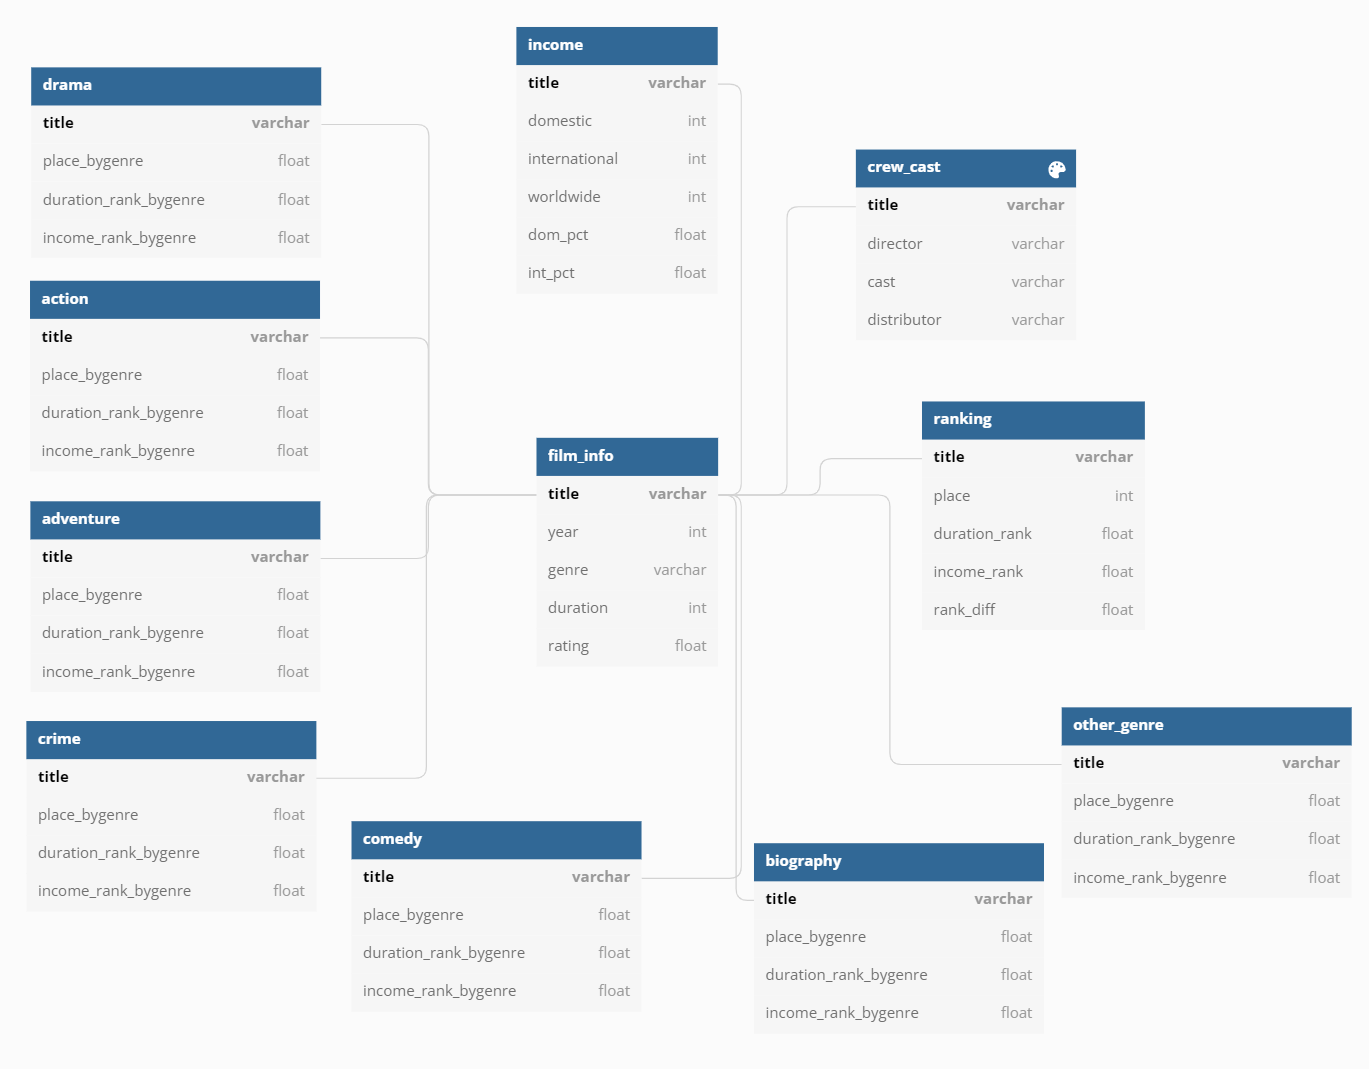

In [63]:
Image("/project/Individual/graphs/films_structure.png", width = 900)

### 5.2	Prepare Subset Tables

<br>
Before writing the data into PostgreSQL database, the subset tables designed in the schema are all prepared separately and stored as parquet files.
<br>

In [64]:
# Get all the tables based on the schema
# Film information tables
film_info = df_film[['title','year','genre', 'duration','rating']]
make_checkpoint()
crew_cast = df_film[['title','director','cast', 'distributor']]
make_checkpoint()
income = df_film[['title','domestic_k','international_k', 'worldwide_k', 'dom_pct', 'int_pct']]
make_checkpoint()
ranking = df_film[['title','place','duration_rank', 'income_rank', 'rank_diff']]
make_checkpoint()

In [65]:
film_info

title  year      genre  duration  rating
0     The Shawshank Redemption  1994      Drama       142  9.2334
1                The Godfather  1972      Crime       175  9.1554
2              The Dark Knight  2008     Action       152  8.9842
3       The Godfather: Part II  1974      Crime       202  8.9837
4                 12 Angry Men  1957      Crime        96  8.9463
..                         ...   ...        ...       ...     ...
245                    Aladdin  1992  Adventure        90  8.0070
246                   The Help  2011      Drama       146  8.0049
247       Beauty and the Beast  1991  Animation        84  8.0045
248  Du rififi chez les hommes  1955      Crime       118  8.0024
249         Dances with Wolves  1990  Adventure       181  8.0016

[250 rows x 5 columns]

In [66]:
crew_cast

title              director  \
0     The Shawshank Redemption        Frank Darabont   
1                The Godfather  Francis Ford Coppola   
2              The Dark Knight     Christopher Nolan   
3       The Godfather: Part II  Francis Ford Coppola   
4                 12 Angry Men          Sidney Lumet   
..                         ...                   ...   
245                    Aladdin          Ron Clements   
246                   The Help           Tate Taylor   
247       Beauty and the Beast        Gary Trousdale   
248  Du rififi chez les hommes          Jules Dassin   
249         Dances with Wolves         Kevin Costner   

                               cast                          distributor  
0       Tim Robbins, Morgan Freeman                    Columbia Pictures  
1          Marlon Brando, Al Pacino                   Paramount Pictures  
2      Christian Bale, Heath Ledger                         Warner Bros.  
3         Al Pacino, Robert De Niro                   Paramount Pictures  
4          Henry Fonda, Lee J. Cobb                       United Artists  
..                              ...                                  ...  
245   Scott Weinger, Robin Williams  Walt Disney Studios Motion Pictures  
246         Emma Stone, Viola Davis  Walt Disney Studios Motion Pictures  
247      Paige O'Hara, Robby Benson  Walt Disney Studios Motion Pictures  
248       Jean Servais, Carl Möhner                                    0  
249   Kevin Costner, Mary McDonnell                       Orion Pictures  

[250 rows x 4 columns]

In [67]:
income

title  domestic_k  international_k  worldwide_k  \
0     The Shawshank Redemption   28767.189          117.315    28884.504   
1                The Godfather  136381.073       113960.743   250341.816   
2              The Dark Knight  534987.076       471115.201  1006102.277   
3       The Godfather: Part II   47834.595          126.415    47961.010   
4                 12 Angry Men       0.000            0.955        0.955   
..                         ...         ...              ...          ...   
245                    Aladdin  217350.219       286700.000   504050.219   
246                   The Help  169708.112        46931.000   216639.112   
247       Beauty and the Beast  218967.620       186043.788   424967.620   
248  Du rififi chez les hommes     517.975            3.367      521.342   
249         Dances with Wolves  184208.848       240000.000   424208.848   

     dom_pct  int_pct  
0     0.9959   0.0041  
1     0.5448   0.4552  
2     0.5317   0.4683  
3     0.9974   0.0026  
4     0.0000   1.0000  
..       ...      ...  
245   0.4312   0.5688  
246   0.7834   0.2166  
247   0.5153   0.4378  
248   0.9935   0.0065  
249   0.4342   0.5658  

[250 rows x 6 columns]

In [68]:
ranking

title  place  duration_rank  income_rank  rank_diff
0     The Shawshank Redemption      1           70.5        150.0      149.0
1                The Godfather      2           22.0         72.0       70.0
2              The Dark Knight      3           50.5         11.0        8.0
3       The Godfather: Part II      4            6.0        131.0      127.0
4                 12 Angry Men      5          220.5        240.0      235.0
..                         ...    ...            ...          ...        ...
245                    Aladdin    246          233.0         32.0     -214.0
246                   The Help    247           62.5         79.0     -168.0
247       Beauty and the Beast    248          245.0         43.0     -205.0
248  Du rififi chez les hommes    249          157.5        204.0      -45.0
249         Dances with Wolves    250           13.5         44.0     -206.0

[250 rows x 5 columns]

In [69]:
# Genre tables
drama = pd.DataFrame(df_film[df_film['genre'] == 'Drama'][['title', 'place_bygenre', 'duration_rank_bygenre', 
                                                           'income_rank_bygenre']].reset_index(drop = True))
make_checkpoint()
action = pd.DataFrame(df_film[df_film['genre'] == 'Action'][['title', 'place_bygenre', 'duration_rank_bygenre', 
                                                             'income_rank_bygenre']].reset_index(drop = True))
make_checkpoint()
adventure = pd.DataFrame(df_film[df_film['genre'] == 'Adventure'][['title', 'place_bygenre', 'duration_rank_bygenre', 
                                                                   'income_rank_bygenre']].reset_index(drop = True))
make_checkpoint()
crime = pd.DataFrame(df_film[df_film['genre'] == 'Crime'][['title', 'place_bygenre', 'duration_rank_bygenre', 
                                                           'income_rank_bygenre']].reset_index(drop = True))
make_checkpoint()
comedy = pd.DataFrame(df_film[df_film['genre'] == 'Comedy'][['title', 'place_bygenre', 'duration_rank_bygenre', 
                                                             'income_rank_bygenre']].reset_index(drop = True))
make_checkpoint()
biography = pd.DataFrame(df_film[df_film['genre'] == 'Biography'][['title', 'place_bygenre', 'duration_rank_bygenre', 
                                                                   'income_rank_bygenre']].reset_index(drop = True))
make_checkpoint()

In [70]:
Animation = pd.DataFrame(df_film[df_film['genre'] == 'Animation'][['title', 'place_bygenre', 'duration_rank_bygenre', 
                                                                   'income_rank_bygenre']].reset_index(drop = True))
Horror = pd.DataFrame(df_film[df_film['genre'] == 'Horror'][['title', 'place_bygenre', 'duration_rank_bygenre', 
                                                             'income_rank_bygenre']].reset_index(drop = True))
Mystery = pd.DataFrame(df_film[df_film['genre'] == 'Mystery'][['title', 'place_bygenre', 'duration_rank_bygenre', 
                                                               'income_rank_bygenre']].reset_index(drop = True))
Western = pd.DataFrame(df_film[df_film['genre'] == 'Western'][['title', 'place_bygenre', 'duration_rank_bygenre', 
                                                               'income_rank_bygenre']].reset_index(drop = True))
Film_Noir = pd.DataFrame(df_film[df_film['genre'] == 'Film-Noir'][['title', 'place_bygenre', 'duration_rank_bygenre', 
                                                                   'income_rank_bygenre']].reset_index(drop = True))
frames = [Animation, Horror, Mystery, Western, Film_Noir]
other_genre = pd.concat(frames).reset_index(drop = True)
make_checkpoint()

In [71]:
drama

title  place_bygenre  duration_rank_bygenre  \
0          The Shawshank Redemption           68.0                   20.0   
1                      Forrest Gump           67.0                   20.0   
2                        Fight Club           66.0                   22.0   
3   One Flew Over the Cuckoo's Nest           65.0                   26.0   
4             It's a Wonderful Life           64.0                   31.0   
..                              ...            ...                    ...   
63                    Amores perros            5.0                   10.0   
64                   Babam ve Oglum            4.0                   52.0   
65                          Persona            3.0                   67.0   
66                        Ah-ga-ssi            2.0                   17.0   
67                         The Help            1.0                   15.5   

    income_rank_bygenre  
0                  32.0  
1                   1.0  
2                  17.0  
3                  16.0  
4                  49.0  
..                  ...  
63                 40.0  
64                 41.0  
65                 64.0  
66                 28.0  
67                 11.0  

[68 rows x 4 columns]

In [72]:
action

title  place_bygenre  \
0                                     The Dark Knight           48.0   
1       The Lord of the Rings: The Return of the King           47.0   
2   The Lord of the Rings: The Fellowship of the Ring           46.0   
3                                           Inception           45.0   
4               The Lord of the Rings: The Two Towers           44.0   
5                             The Empire Strikes Back           43.0   
6                                          The Matrix           42.0   
7                                Shichinin no samurai           41.0   
8                                           Star Wars           40.0   
9                          Terminator 2: Judgment Day           39.0   
10                                               Léon           38.0   
11                                          Gladiator           37.0   
12                                            Seppuku           36.0   
13                            Raiders of the Lost Ark           35.0   
14                             Avengers: Infinity War           34.0   
15                                             Aliens           33.0   
16                              The Dark Knight Rises           32.0   
17                  Spider-Man: Into the Spider-Verse           31.0   
18                                           Oldeuboi           30.0   
19                                      Mononoke-hime           29.0   
20                                  Avengers: Endgame           28.0   
21         Star Wars: Episode VI - Return of the Jedi           27.0   
22                            Spider-Man: No Way Home           26.0   
23                                               Heat           25.0   
24                                           Die Hard           24.0   
25                 Indiana Jones and the Last Crusade           23.0   
26                                               1917           22.0   
27                                      Batman Begins           21.0   
28                                             Dangal           20.0   
29                                                Ran           19.0   
30                                            Yôjinbô           18.0   
31                                   Kill Bill: Vol 1           17.0   
32                                      Jurassic Park           16.0   
33                                     V for Vendetta           15.0   
34                Lock, Stock and Two Smoking Barrels           14.0   
35                                            Warrior           13.0   
36                                       Blade Runner           12.0   
37                                        The General           11.0   
38                                        Sherlock Jr           10.0   
39                           How to Train Your Dragon            9.0   
40                                 Mad Max: Fury Road            8.0   
41                                     Ford v Ferrari            7.0   
42                                     The Terminator            6.0   
43                                               Rush            5.0   
44                                              Logan            4.0   
45                                         The Batman            3.0   
46                                    The Incredibles            2.0   
47  Pirates of the Caribbean: The Curse of the Bla...            1.0   

    duration_rank_bygenre  income_rank_bygenre  
0                    12.5                  7.0  
1                     2.0                  4.0  
2                     5.0                  9.0  
3                    15.5                 10.0  
4                     4.0                  8.0  
5                    31.0                 16.0  
6                    23.0                 21.0  
7                     1.0                 44.0  
8                    33.0                 11.0  
9                    21.0    

In [73]:
adventure

title  place_bygenre  \
0                Il buono, il brutto, il cattivo           37.0   
1                                   Interstellar           36.0   
2                             Back to the Future           35.0   
3                  Sen to Chihiro no kamikakushi           34.0   
4                                  The Lion King           33.0   
5                                         WALL·E           32.0   
6                                      Toy Story           31.0   
7                                           Coco           30.0   
8                           Inglourious Basterds           29.0   
9                                    Toy Story 3           28.0   
10                         2001: A Space Odyssey           27.0   
11                            Lawrence of Arabia           26.0   
12                            North by Northwest           25.0   
13                                            Up           24.0   
14               Monty Python and the Holy Grail           23.0   
15              The Treasure of the Sierra Madre           22.0   
16                              The Great Escape           21.0   
17                                  Finding Nemo           20.0   
18                                    Inside Out           19.0   
19                  The Bridge on the River Kwai           18.0   
20                          Hauru no ugoku shiro           17.0   
21                                 The Gold Rush           16.0   
22                                       Ben-Hur           15.0   
23  Harry Potter and the Deathly Hallows: Part 2           14.0   
24                      The Grand Budapest Hotel           13.0   
25                         Le salaire de la peur           12.0   
26                                  Barry Lyndon           11.0   
27                                         Klaus           10.0   
28                                          Jaws            9.0   
29                                 Monsters, Inc            8.0   
30                                   Stand by Me            7.0   
31                                 Into the Wild            6.0   
32                              The Wizard of Oz            5.0   
33                                   Ratatouille            4.0   
34                                   Dersu Uzala            3.0   
35                                       Aladdin            2.0   
36                            Dances with Wolves            1.0   

    duration_rank_bygenre  income_rank_bygenre  
0                     7.5                 28.0  
1                     6.0                  8.0  
2                    20.0                 16.0  
3                    17.0                 17.0  
4                    36.0                  3.0  
5                    27.0                 11.0  
6                    37.0                 15.0  
7                    22.0                  6.0  
8                     9.0                 18.0  
9                    23.0                  2.0  
10                   10.0                 22.0  
11                    1.0                 25.0  
12                   13.0                 33.0  
13                   28.5                  7.0  
14                   33.0                 30.0  
15                   16.0                 29.0  
16                    5.0                 31.0  
17                   25.0                  4.0  
18                   30.5                  5.0  
19                    7.5                 26.0  
20                   19.0                 19.0  
21                   30.5                 34.0  
22                    2.0                 21.0  
23                   15.0                  1.0  
24                   26.0                 20.0  
25                   14.0                 36.0  
26                    3.0                 32.0  
27                   28.5                 37.0  
28                   18.0                 13.0  
29                   32.0 

In [74]:
crime

title  place_bygenre  duration_rank_bygenre  \
0                       The Godfather           34.0                    5.0   
1              The Godfather: Part II           33.0                    2.0   
2                        12 Angry Men           32.0                   33.0   
3                        Pulp Fiction           31.0                    7.0   
4                               Se7en           30.0                   16.5   
5            The Silence of the Lambs           29.0                   20.5   
6                      Cidade de Deus           28.0                   14.0   
7                      The Green Mile           27.0                    3.0   
8                  The Usual Suspects           26.0                   27.0   
9                        The Departed           25.0                    9.0   
10        Witness for the Prosecution           24.0                   23.0   
11                              Joker           23.0                   18.5   
12        Once Upon a Time in America           22.0                    1.0   
13                     Reservoir Dogs           21.0                   29.5   
14                  Tengoku to jigoku           20.0                   10.0   
15  M - Eine Stadt sucht einen Mörder           19.0                   22.0   
16                 A Clockwork Orange           18.0                   12.0   
17                   Double Indemnity           17.0                   26.0   
18                           Scarface           16.0                    6.0   
19                        Taxi Driver           15.0                   24.0   
20              To Kill a Mockingbird           14.0                   15.0   
21                    LA Confidential           13.0                   11.0   
22                             Casino           12.0                    4.0   
23                           Rashômon           11.0                   34.0   
24             No Country for Old Men           10.0                   18.5   
25                  Dial M for Murder            9.0                   28.0   
26                              Fargo            8.0                   31.5   
27                          Prisoners            7.0                    8.0   
28                  On the Waterfront            6.0                   25.0   
29                     Salinui chueok            5.0                   13.0   
30                     Cool Hand Luke            4.0                   16.5   
31             Les quatre cents coups            3.0                   29.5   
32                           La haine            2.0                   31.5   
33          Du rififi chez les hommes            1.0                   20.5   

    income_rank_bygenre  
0                   6.0  
1                  14.0  
2                  32.0  
3                   7.0  
4                   2.0  
5                   5.0  
6                  15.0  
7                   4.0  
8                  18.0  
9                   3.0  
10                 31.0  
11                  1.0  
12                 19.0  
13                 20.0  
14                 27.5  
15                 26.0  
16                 17.0  
17                 30.0  
18                 12.0  
19                 16.0  
20                 22.0  
21                  9.0  
22                 11.0  
23                 27.5  
24                  8.0  
25                 29.0  
26                 13.0  
27                 10.0  
28                 33.5  
29                 21.0  
30                 33.5  
31                 25.0  
32                 24.0  
33                 23.0

In [75]:
comedy

title  place_bygenre  \
0                                     La vita è bella           24.0   
1                                        Gisaengchung           23.0   
2                                        Modern Times           22.0   
3                                         City Lights           21.0   
4                                  The Great Dictator           20.0   
5   Dr Strangelove or: How I Learned to Stop Worry...           19.0   
6                                 Singin' in the Rain           18.0   
7                                            3 Idiots           17.0   
8                 Le fabuleux destin d'Amélie Poulain           16.0   
9                                       The Apartment           15.0   
10                                          The Sting           14.0   
11                                             Snatch           13.0   
12                                            The Kid           12.0   
13                                   Some Like It Hot           11.0   
14                                    The Truman Show           10.0   
15          Three Billboards Outside Ebbing, Missouri            9.0   
16                        Mr Smith Goes to Washington            8.0   
17                                   Relatos salvajes            7.0   
18                                   The Big Lebowski            6.0   
19                                 Dead Poets Society            5.0   
20                                      Groundhog Day            4.0   
21                                 To Be or Not to Be            3.0   
22                                      Life of Brian            2.0   
23                              It Happened One Night            1.0   

    duration_rank_bygenre  income_rank_bygenre  
0                    12.0                  4.0  
1                     2.0                  2.0  
2                    22.5                 18.0  
3                    22.5                 21.0  
4                     6.5                 17.0  
5                    20.0                 15.0  
6                    16.5                 16.0  
7                     1.0                 10.0  
8                     8.5                  5.0  
9                     6.5                 14.0  
10                    3.5                  7.0  
11                   15.0                  8.0  
12                   24.0                 22.0  
13                   10.0                 19.0  
14                   16.5                  1.0  
15                   13.0                  6.0  
16                    3.5                 20.0  
17                    8.5                 12.0  
18                   11.0                 11.0  
19                    5.0                  3.0  
20                   18.0                  9.0  
21                   19.0                 23.5  
22                   21.0                 13.0  
23                   14.0                 23.5

In [76]:
biography

title  place_bygenre  duration_rank_bygenre  \
0             Schindler's List           23.0                    1.0   
1                   Goodfellas           22.0                   10.0   
2                  The Pianist           21.0                    9.0   
3             The Intouchables           20.0                   21.0   
4                   Braveheart           19.0                    4.0   
5                      Amadeus           18.0                    6.5   
6                     Hamilton           17.0                    6.5   
7                Der Untergang           16.0                    8.0   
8                   Green Book           15.0                   16.0   
9      The Wolf of Wall Street           14.0                    3.0   
10            A Beautiful Mind           13.0                   13.0   
11            The Elephant Man           12.0                   19.0   
12                 Raging Bull           11.0                   17.5   
13         Catch Me If You Can           10.0                   11.0   
14            12 Years a Slave            9.0                   14.0   
15   In the Name of the Father            8.0                   15.0   
16               Hacksaw Ridge            7.0                   12.0   
17  La passion de Jeanne d'Arc            6.0                   22.0   
18                Hotel Rwanda            5.0                   20.0   
19                   Spotlight            4.0                   17.5   
20         Hachi: A Dog's Tale            3.0                   23.0   
21          The Sound of Music            2.0                    5.0   
22                      Gandhi            1.0                    2.0   

    income_rank_bygenre  
0                   4.0  
1                  17.0  
2                  11.0  
3                   1.0  
4                   7.0  
5                  16.0  
6                  23.0  
7                  13.0  
8                   5.0  
9                   2.0  
10                  6.0  
11                 20.0  
12                 21.0  
13                  3.0  
14                  8.0  
15                 14.0  
16                  9.0  
17                 22.0  
18                 19.0  
19                 12.0  
20                 18.0  
21                 10.0  
22                 15.0

In [77]:
other_genre

title  place_bygenre  duration_rank_bygenre  \
0                 Hotaru no haka            5.0                    3.0   
1                  Kimi no na wa            4.0                    1.0   
2               Tonari no Totoro            3.0                    4.0   
3                   Mary and Max            2.0                    2.0   
4           Beauty and the Beast            1.0                    5.0   
5                         Psycho            4.0                    3.5   
6                          Alien            3.0                    2.0   
7                      The Thing            2.0                    3.5   
8                   The Exorcist            1.0                    1.0   
9                    Rear Window            4.0                    4.0   
10                       Memento            3.0                    3.0   
11                       Vertigo            2.0                    2.0   
12                Shutter Island            1.0                    1.0   
13  Once Upon a Time in the West            2.0                    1.0   
14    Per qualche dollaro in più            1.0                    2.0   
15                 The Third Man            1.0                    1.0   

    income_rank_bygenre  
0                   5.0  
1                   2.0  
2                   3.0  
3                   4.0  
4                   1.0  
5                   3.0  
6                   2.0  
7                   4.0  
8                   1.0  
9                   3.0  
10                  2.0  
11                  4.0  
12                  1.0  
13                  2.0  
14                  1.0  
15                  1.0

In [78]:
# Convert all tables into spark data frame
df_film_info_spark = spark.createDataFrame(film_info)
df_crew_cast_spark = spark.createDataFrame(crew_cast)
df_income_spark = spark.createDataFrame(income)
df_ranking_spark = spark.createDataFrame(ranking)
df_drama_spark = spark.createDataFrame(drama)
df_action_spark = spark.createDataFrame(action)
df_adventure_spark = spark.createDataFrame(adventure)
df_crime_spark = spark.createDataFrame(crime)
df_comedy_spark = spark.createDataFrame(comedy)
df_biography_spark = spark.createDataFrame(biography)
df_other_genre_spark = spark.createDataFrame(other_genre)

In [79]:
df_film_info_spark.printSchema()
df_crew_cast_spark.printSchema()
df_income_spark.printSchema()
df_ranking_spark.printSchema()
df_drama_spark.printSchema()
df_action_spark.printSchema()
df_adventure_spark.printSchema()
df_crime_spark.printSchema()
df_comedy_spark.printSchema()
df_biography_spark.printSchema()
df_other_genre_spark.printSchema()

root
 |-- title: string (nullable = true)
 |-- year: long (nullable = true)
 |-- genre: string (nullable = true)
 |-- duration: long (nullable = true)
 |-- rating: double (nullable = true)

root
 |-- title: string (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- distributor: string (nullable = true)

root
 |-- title: string (nullable = true)
 |-- domestic_k: double (nullable = true)
 |-- international_k: double (nullable = true)
 |-- worldwide_k: double (nullable = true)
 |-- dom_pct: double (nullable = true)
 |-- int_pct: double (nullable = true)

root
 |-- title: string (nullable = true)
 |-- place: long (nullable = true)
 |-- duration_rank: double (nullable = true)
 |-- income_rank: double (nullable = true)
 |-- rank_diff: double (nullable = true)

root
 |-- title: string (nullable = true)
 |-- place_bygenre: double (nullable = true)
 |-- duration_rank_bygenre: double (nullable = true)
 |-- income_rank_bygenre: double (nullable = tru

In [80]:
# Convert all data frames into parquet files
df_film_info_spark.write.parquet("/project/Individual/parquet_files/film_info.parquet", mode = 'overwrite')
df_crew_cast_spark.write.parquet("/project/Individual/parquet_files/crew_cast.parquet", mode = 'overwrite')
df_income_spark.write.parquet("/project/Individual/parquet_files/income.parquet", mode = 'overwrite')
df_ranking_spark.write.parquet("/project/Individual/parquet_files/ranking.parquet", mode = 'overwrite')
df_drama_spark.write.parquet("/project/Individual/parquet_files/drama.parquet", mode = 'overwrite')
df_action_spark.write.parquet("/project/Individual/parquet_files/action.parquet", mode = 'overwrite')
df_adventure_spark.write.parquet("/project/Individual/parquet_files/adventure.parquet", mode = 'overwrite')
df_crime_spark.write.parquet("/project/Individual/parquet_files/crime.parquet", mode = 'overwrite')
df_comedy_spark.write.parquet("/project/Individual/parquet_files/comedy.parquet", mode = 'overwrite')
df_biography_spark.write.parquet("/project/Individual/parquet_files/biography.parquet", mode = 'overwrite')
df_other_genre_spark.write.parquet("/project/Individual/parquet_files/other_genre.parquet", mode = 'overwrite')
make_checkpoint()

### 5.3	Write into PostgreSQL Database

<br>
The schema is written into the PostgreSQL database by a line of shell script and the selected data are all written into the database using spark.write.jdbc.
<br>

In [81]:
# Create the schema
!PGPASSWORD=qwerty123 psql -h depgdb.crhso94tou3n.eu-west-2.rds.amazonaws.com -d yihansun21 -U yihansun21 -c '\i schema.sql'


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

psql:schema.sql:1: NOTICE:  drop cascades to 11 other objects
DETAIL:  drop cascades to table films.film_info
drop cascades to table films.crew_cast
drop cascades to table films.income
drop cascades to table films.ranking
drop cascades to table films.drama
drop cascades to table films.action
drop cascades to table films.adventur

In [82]:
# Read all the tables
film_info = spark.read.parquet("/project/Individual/parquet_files/film_info.parquet")
crew_cast = spark.read.parquet("/project/Individual/parquet_files/crew_cast.parquet")
income = spark.read.parquet("/project/Individual/parquet_files/income.parquet")
ranking = spark.read.parquet("/project/Individual/parquet_files/ranking.parquet")
drama = spark.read.parquet("/project/Individual/parquet_files/drama.parquet")
action = spark.read.parquet("/project/Individual/parquet_files/action.parquet")
adventure = spark.read.parquet("/project/Individual/parquet_files/adventure.parquet")
crime = spark.read.parquet("/project/Individual/parquet_files/crime.parquet")
comedy = spark.read.parquet("/project/Individual/parquet_files/comedy.parquet")
biography = spark.read.parquet("/project/Individual/parquet_files/biography.parquet")
other_genre = spark.read.parquet("/project/Individual/parquet_files/other_genre.parquet")
make_checkpoint()

In [83]:
# Information for postgresql login
postgres_uri = "jdbc:postgresql://depgdb.crhso94tou3n.eu-west-2.rds.amazonaws.com:5432/yihansun21"
user = "yihansun21"
password = "qwerty123"

In [84]:
# Write the tables into database
film_info.write.jdbc(url=postgres_uri, table="films.film_info", mode="append", properties={"user":user, "password": password, 
                                                                                           "driver": "org.postgresql.Driver" })
make_checkpoint()
crew_cast.write.jdbc(url=postgres_uri, table="films.crew_cast", mode="append", properties={"user":user, "password": password, 
                                                                                           "driver": "org.postgresql.Driver" })
make_checkpoint()
income.write.jdbc(url=postgres_uri, table="films.income", mode="append", properties={"user":user, "password": password, 
                                                                                     "driver": "org.postgresql.Driver" })
make_checkpoint()
ranking.write.jdbc(url=postgres_uri, table="films.ranking", mode="append", properties={"user":user, "password": password, 
                                                                                       "driver": "org.postgresql.Driver" })
make_checkpoint()
drama.write.jdbc(url=postgres_uri, table="films.drama", mode="append", properties={"user":user, "password": password, 
                                                                                   "driver": "org.postgresql.Driver" })
make_checkpoint()
action.write.jdbc(url=postgres_uri, table="films.action", mode="append", properties={"user":user, "password": password, 
                                                                                     "driver": "org.postgresql.Driver" })
make_checkpoint()
adventure.write.jdbc(url=postgres_uri, table="films.adventure", mode="append", properties={"user":user, "password": password, 
                                                                                           "driver": "org.postgresql.Driver" })
make_checkpoint()
crime.write.jdbc(url=postgres_uri, table="films.crime", mode="append", properties={"user":user, "password": password, 
                                                                                   "driver": "org.postgresql.Driver" })
make_checkpoint()
comedy.write.jdbc(url=postgres_uri, table="films.comedy", mode="append", properties={"user":user, "password": password, 
                                                                                     "driver": "org.postgresql.Driver" })
make_checkpoint()
biography.write.jdbc(url=postgres_uri, table="films.biography", mode="append", properties={"user":user, "password": password, 
                                                                                           "driver": "org.postgresql.Driver" })
make_checkpoint()
other_genre.write.jdbc(url=postgres_uri, table="films.other_genre", mode="append", properties={"user":user, "password": password, 
                                                                                               "driver": "org.postgresql.Driver" })
make_checkpoint()

### 5.4	SQL Query Example

<br>
As discussed above, one of the objectives of this report is to build a data querying system which can help gain insights to the current film industry. After writing the collected data into database, such purpose can be achieved by performing SQL queries. This section gives one example of using SQL query for data manipulation and understanding.
<br>
The example here is to calculate the average performance of films distributed by different companies. The mean value of each distributor’s films’ rating rankings, worldwide box office income rankings and the differentials between the two values are calculated. Using the aforementioned rule to interpret the “rank_diff” value, sorting the output by “average rank_diff” value, it is clear that the top companies tend to produce highly recognised but less profitable films, while others are the opposite. Such cross comparison is very useful for a film company to identify its value proposition and position in the industry.
<br>

In [85]:
# Query example:
# Calculate the average performance by distributor
query = '''
SELECT ROUND(CAST(avg(place) AS FLOAT)) as avg_place, ROUND(CAST(avg(income_rank) AS FLOAT)) as avg_income_rank, ROUND(CAST(avg(rank_diff) AS FLOAT)) as avg_rank_diff 
FROM films.ranking as r
JOIN (SELECT title, distributor FROM films.crew_cast) as c

ON r.title = c.title

Group by distributor

Order by avg_rank_diff DESC
'''

In [86]:
df_query = spark.read \
    .format("jdbc") \
    .option("url", postgres_uri) \
    .option("query", query) \
    .option("user", user) \
    .option("password", password) \
    .option("driver", "org.postgresql.Driver") \
    .load()

df_query.printSchema()

root
 |-- avg_place: double (nullable = true)
 |-- avg_income_rank: double (nullable = true)
 |-- avg_rank_diff: double (nullable = true)



In [87]:
df_query = df_query.toPandas()

In [88]:
df_query

avg_place  avg_income_rank  avg_rank_diff
0        48.0            205.0          157.0
1       110.0            220.0          110.0
2        71.0            176.0          105.0
3       144.0            246.0          102.0
4        82.0            182.0          100.0
5       115.0            200.0           85.0
6       122.0            191.0           70.0
7       169.0            225.0           56.0
8       138.0            190.0           52.0
9        62.0            108.0           47.0
10       87.0            124.0           37.0
11       88.0            124.0           36.0
12       35.0             71.0           36.0
13       80.0            115.0           35.0
14      139.0            174.0           34.0
15       17.0             50.0           32.0
16       92.0            122.0           31.0
17      115.0            145.0           30.0
18      180.0            209.0           29.0
19      177.0            198.0           21.0
20       95.0            102.0            8.0
21      194.0            199.0            5.0
22      139.0            142.0            3.0
23       29.0             31.0            2.0
24      161.0            164.0            2.0
25      116.0            112.0           -4.0
26      125.0            114.0          -10.0
27       59.0             48.0          -11.0
28      171.0            158.0          -14.0
29      236.0            219.0          -17.0
30      119.0             96.0          -23.0
31      136.0            111.0          -25.0
32      228.0            201.0          -27.0
33       76.0             47.0          -29.0
34       85.0             55.0          -30.0
35      123.0             92.0          -31.0
36      133.0             91.0          -41.0
37      192.0            142.0          -50.0
38      225.0            174.0          -51.0
39      178.0            120.0          -58.0
40      199.0            138.0          -61.0
41      154.0             90.0          -64.0
42      179.0             86.0          -92.0
43      140.0             43.0          -97.0
44      216.0            107.0         -109.0
45      200.0             33.0         -167.0

Other queries are also available and valuable. For instance, the companies can check their films’ performance by genre, which allows them to understand their strength and weakness. Or the database can also be used to test the public recognition and commercial value of different directors and actors/actresses. 
<br>

## 6 Data Storage Control and Lineage

### 6.1	Data Storage

<br>
In this report, all datasets collected are converted to the parquet format for storage in order to make data more tractable and manageable. Apache Parquet is an open-source, column-oriented data storage format. Another similar high quality data storage format is avro. However, since avro is more row-oriented, parquet is used in this report. In parquet format, values are clustered by columns. Therefore it can not only provide efficient data compression and encoding schemes with enhanced performance, but also properly sort and retrieve row order. All these aforementioned advantages of parquet format prove to be useful for large scale data storage, which improves the usability of the system built in this report even with larger data volume.
<br><br>
Moreover, as introduced in section 5, all datasets are eventually divided into eleven different tables and wrote into PostgreSQL database for efficient operation and maintenance.
<br><br>

### 6.2	Source Version Control

<br>
Although this is an individual project, good source version control is still important as it helps to organise and keep track of the development of codes and files. Git and GitHub are used for source version control by pushing commits. When version of files updated, new commits will replace the old ones.
<br><br>
The link of GitHub repository is: https://github.com/HermioneSun0321/DataEngineering
<br><br>

### 6.3	Data Lineage

<br>
Data lineage is the process of understanding, recording, and visualizing data as it flows from data sources to consumption throughout the project, including all the data transformations. It helps to track errors, lower risks and ensures accuracy. It is a process that is particularly important in large scale data manipulating and teamwork collaborations (Imperva, 2021).  
<br>
In this project, Data Version Control (DVC) is used for data lineage just like in previous group assignments. After each data collection and transformation throughout the project, check points are made. Screenshots of the auto script for running the process is demonstrated below. The original script files are also included in the zip folder uploaded with the final report.
<br>

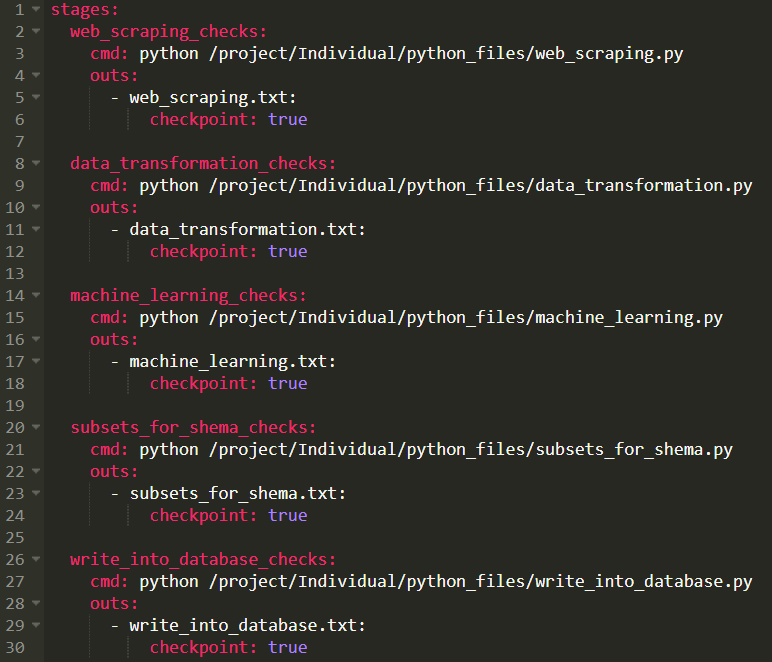

In [89]:
Image("/project/Individual/graphs/dvc.png", width = 500)

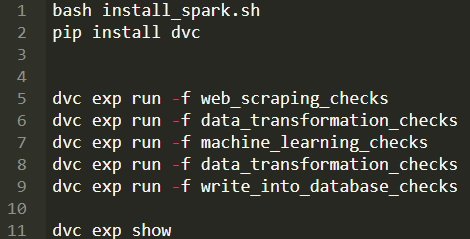

In [90]:
Image("/project/Individual/graphs/auto_script.png", width = 500)

### 6.4	Automate Terraform with GitHub Actions

Terraform with GitHub actions are also set up  for automation.

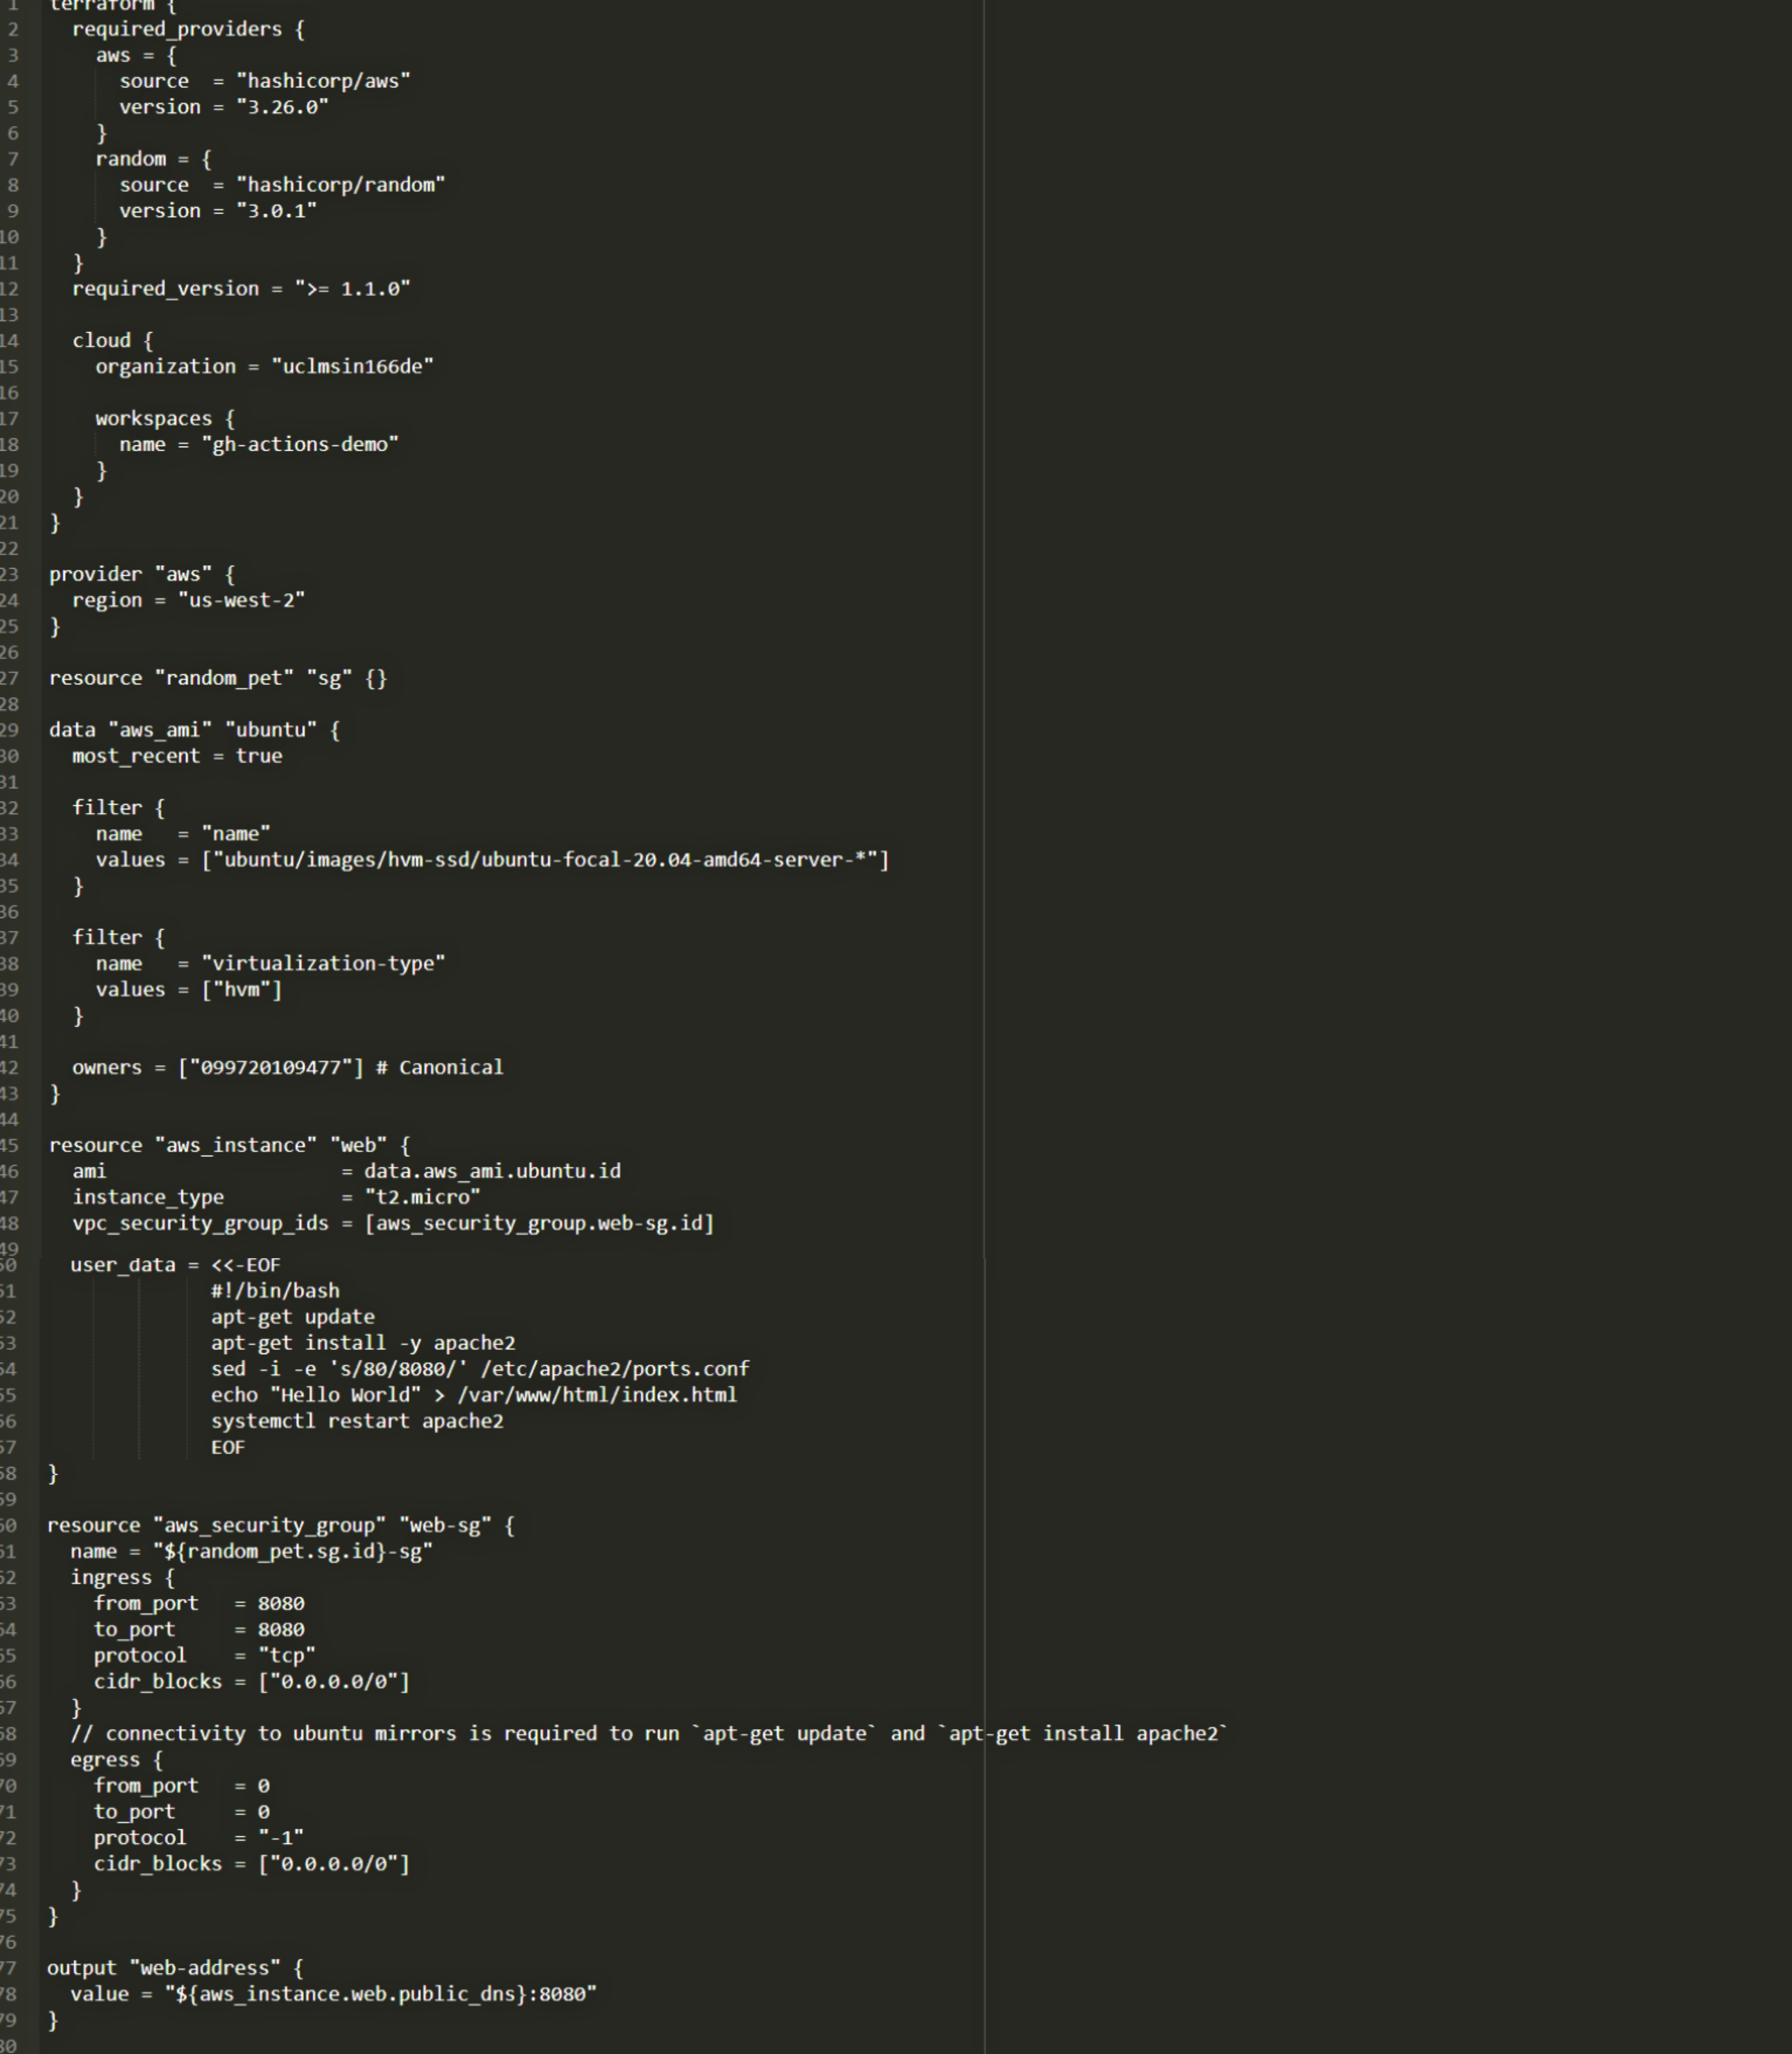

In [91]:
Image("/project/Individual/graphs/tf.jpg", width = 900)

## 7 Conclusion

### 7.1	Main Takeaways

<br>
This report started with gathering basic information on the IMDb top 250 rated films using web scraping with BeautifulSoup. Box office income data for the 250 films are also gathered from Mojo, another source.  Data cleaning and transformations carried out to prepare for analysis. For the purpose of viewing the top rated films from a commercial perspective, a machine learning predictive models is built and converted to API for the convince of future usage by others. Last but not least, a systematic querying structure is designed and constructed on collected data and wrote into PostgreSQL database. During the entire process, uniformed data storage formats are utilised, data lineage process is also conducted to ensure the data accuracy. 
<br><br>
In sum, this report managed to provide an approach to gain insights into the business value creation of the film industry by data engineering skills.
<br><br>

### 7.2	Limitations and Future Steps

<br>
Admittedly, there are certain limitations to this project. Firstly, 250 films do not make a very sufficient dataset for analysing, model training or pattern discovering. And the top 250 films list from IMDb covers only highly rated films, which, even from a commercial perspective, are potentially biased as they are more likely to earn more box office incomes. Moreover, due to time and space limitations, the top user reviews data collected are not presented in this report. Given more time and space, they can be used to carry out a sentiment analysis to examine the public opinion on each film.
<br><br>
For future steps, more data from different aspects, especially from professional film industry point of views,  needs to be collected. Finally, the data system constructed in this report can be generalised to other entertainment business such as TV shows and video streaming platforms.
<br><br>

## Reference

Arsalan, 2021. [online] Available at: <https://it-s.com/best-web-scraping-library-scrapy-vs-beautiful-soup-vs-selenium/> [Accessed 20 April 2022].
BBC News. 2020. Disney ends the historic 20th Century Fox brand. [online] Available at: <https://www.bbc.co.uk/news/business-53747270> [Accessed 21 April 2022].

Coursera. 2021. [online] Available at: <https://www.coursera.org/articles/what-does-a-data-engineer-do-and-how-do-i-become-one> [Accessed 19 April 2022].

Escandon, R., 2020. *The Film Industry Made A Record-Breaking 100 Billion Last Year*. [online] Forbes. Available at: <https://www.forbes.com/sites/rosaescandon/2020/03/12/the-film-industry-made-a-record-breaking-100-billion-last-year/?sh=10843e0f34cd> [Accessed 20 April 2022].

Gray, J. and Shenoy, P., 2000, February. Rules of thumb in data engineering. In *Proceedings of 16th International Conference on Data Engineering* (Cat. No. 00CB37073) (pp. 3-10). IEEE.

IMDb. n.d. Top 250 Movies. [online] Available at: <https://www.imdb.com/chart/top> [Accessed 20 April 2022].

Imperva. 2021. *What is Data Lineage | Examples of Tools and Techniques | Imperva*. [online] Available at: <https://www.imperva.com/learn/data-security/data-lineage/#:~:text=Data%20lineage%20is%20the%20process,%2C%20what%20changed%2C%20and%20why.> [Accessed 23 April 2022].

Priyank181, 2021. *Scrape IMDB movie rating and details using Python - GeeksforGeeks. [online] GeeksforGeeks*. Available at: <https://www.geeksforgeeks.org/scrape-imdb-movie-rating-and-details-using-python/> [Accessed 20 April 2022].
